In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pydot
from IPython.display import Image
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import graphviz
import warnings
warnings.filterwarnings('ignore')

# Q1 Representation Learning

In [3]:
red_wine_data = pd.read_csv("winequality-red.csv", sep=";")
white_wine_data = pd.read_csv("winequality-white.csv", sep=";")
wine_data = pd.concat([red_wine_data, white_wine_data])

abalone_data = pd.read_csv("abalone.csv",sep = ",")
abalone_data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',  'Rings']

Importing the Datasets and concating the redwine and whitewine into one dataset

In [4]:
# Nomial Data Sex to Numerical Data
dummie = pd.get_dummies(abalone_data.Sex)
abalone_data = pd.concat([dummie,abalone_data], axis = 'columns')
abalone_data.drop("Sex", axis = 1, inplace = True)

Converting the Nomial data column into the numerical data column

In [5]:
abalone_data

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,0,1,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...,...,...
4171,1,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,0,0,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,0,0,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,1,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The wine Dataset is not null, it has no empty row

In [8]:
abalone_data.isnull().sum()

F                 0
I                 0
M                 0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

The abalone Dataset is not null, it has no empty row

# Performing the Normalization on Abalone data

In [9]:
# Min-Max Scalar 
mms = MinMaxScaler()
abalone_data_mms = abalone_data.copy()
abalone_data_mms.iloc[:,:-1] = mms.fit_transform(abalone_data_mms.iloc[:,:-1])
abalone_data_mms = pd.DataFrame(abalone_data_mms, columns = ['F','I','M', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',  'Rings'])

# Standard Scalar
sc = StandardScaler()
abalone_data_std = abalone_data.copy()
abalone_data_std.iloc[:,:-1] = sc.fit_transform(abalone_data_std.iloc[:,:-1])
abalone_data_std = pd.DataFrame(abalone_data_std, columns = ['F','I','M', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',  'Rings'])

# Performing the Normalization on Wine data

In [10]:
# Standard Scalar
wine_data_std = wine_data.copy()
wine_data_std.iloc[:,:-1] = sc.fit_transform(wine_data_std.iloc[:,:-1])
wine_data_std = pd.DataFrame(wine_data_std, columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"])

# Min-Max Scalar
wine_data_mms = wine_data.copy()
wine_data_mms.iloc[:,:-1] = mms.fit_transform(wine_data_mms.iloc[:,:-1])
wine_data_mms = pd.DataFrame(wine_data_mms, columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"])

In [11]:
q1 = []

In [12]:
raw_list = []

In [13]:
#KNN on the Abalone Data

x_abalone = abalone_data_std.iloc[:,:-1].values
y_abalone = abalone_data_std.iloc[:,-1].values
x_train_abalone, x_test_abalone, y_train_abalone, y_test_abalone = train_test_split(x_abalone, y_abalone, test_size=0.2, random_state=122)


accuracy_list = []
for c in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = c, weights = 'distance', p=1)
    knn.fit(x_train_abalone, y_train_abalone)
    y_pred = knn.predict(x_test_abalone)
    final = accuracy_score(y_test_abalone, y_pred)*100
    accuracy_list.append(final)
    
k_value_raw_abalone = accuracy_list.index(max(accuracy_list))+1
accuracy_raw_abalone = max(accuracy_list)

print("The value of the k for the higher accuracy = ", accuracy_list.index(max(accuracy_list))+1, ", and the accuracy = ", accuracy_raw_abalone)

raw_list.append(accuracy_raw_abalone)

The value of the k for the higher accuracy =  66 , and the accuracy =  29.30622009569378


Performing KNN on the Raw Abalone Data

In [14]:
#KNN on the wine Data

x_wine = wine_data_std.iloc[:,:-1].values
y_wine = wine_data_std.iloc[:,-1].values
x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(x_wine, y_wine, test_size=0.2, random_state=122)


accuracy_list = []
for c in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = c, weights = 'distance', p=1)
    knn.fit(x_train_wine, y_train_wine)
    y_pred = knn.predict(x_test_wine)
    final = accuracy_score(y_test_wine, y_pred)*100
    accuracy_list.append(final)

k_value_raw_wine = accuracy_list.index(max(accuracy_list))+1
accuracy_raw_wine = max(accuracy_list)

print("The value of the k for the higher accuracy = ", k_value_raw_wine, ", and the accuracy = ", accuracy_raw_wine)
raw_list.append(accuracy_raw_wine)

The value of the k for the higher accuracy =  47 , and the accuracy =  69.38461538461539


In [15]:
q1.append(raw_list)

Performing KNN on the Raw wine Data

# Q1.1) Run PCA on each dataset, look at the total variance explained by the principle components. At least, show a plot of the first two principle components using easily distinguishable colours and markers to indicate the labels of each datapoint.


# PCA

In [16]:
#PCA of 2 Dimensions of Abalone 

n = 2
pca = PCA(n_components = n)
pca_abalone = pca.fit_transform(abalone_data_std)
variance_abalone = pca.explained_variance_ratio_
cumSum_abalone = np.cumsum(variance_abalone)
pca_abalone_df = pd.DataFrame(pca_abalone, columns=["PCA1", "PCA2"])
pca_abalone_df

,PCA1,PCA2
0,-4.091587,0.796383
1,-0.826305,-0.288645
2,-0.626083,1.066407
3,-4.725903,1.556743
4,-3.295785,1.265120
...,...,...
4171,1.499830,-0.175781
4172,0.574240,-0.727683
4173,0.557987,-2.408263
4174,1.127997,-1.458953


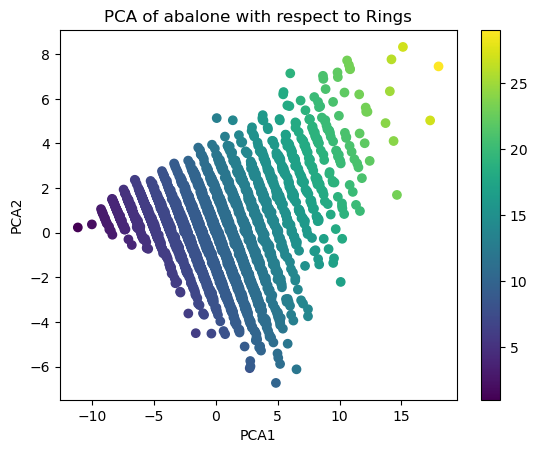

In [17]:
plt.scatter(pca_abalone[:, 0], pca_abalone[:, 1], c = abalone_data_std["Rings"])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of abalone with respect to Rings')
plt.colorbar()
plt.show()

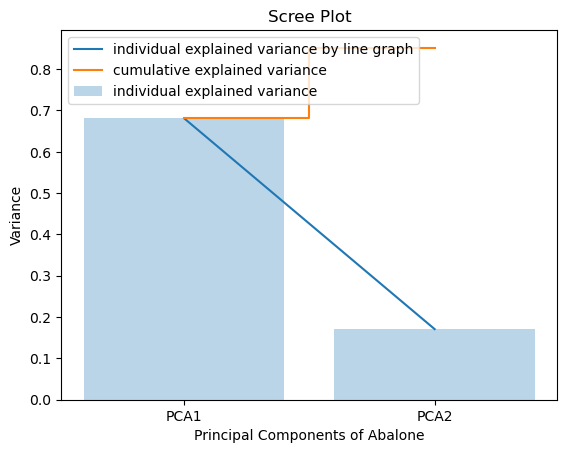

In [18]:
plt.bar(x= range(0,n), height= variance_abalone, tick_label= ["PCA1", "PCA2"],alpha=0.3, align='center', label='individual explained variance')
plt.plot(range(0,n), variance_abalone, label='individual explained variance by line graph')
plt.step(range(0,n), cumSum_abalone, where='mid', label='cumulative explained variance')
plt.xlabel('Principal Components of Abalone')
plt.ylabel('Variance')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

In [19]:
#PCA of 2 Dimensions of Wine Data

n = 2
pca = PCA(n_components = n)
pca_wine = pca.fit_transform(wine_data_std)
variance_wine = pca.explained_variance_ratio_
cumSum_wine = np.cumsum(variance_wine)

In [20]:
pca_wine_df = pd.DataFrame(pca_wine, columns=["PCA1", "PCA2"])
pca_wine_df

,PCA1,PCA2
0,-3.298280,0.558798
1,-3.160524,1.207233
2,-3.178480,0.965648
3,-1.636622,1.775728
4,-3.298280,0.558798
...,...,...
6492,0.046456,-1.929704
6493,1.778325,0.850005
6494,0.606611,-0.660484
6495,0.340154,-3.712591


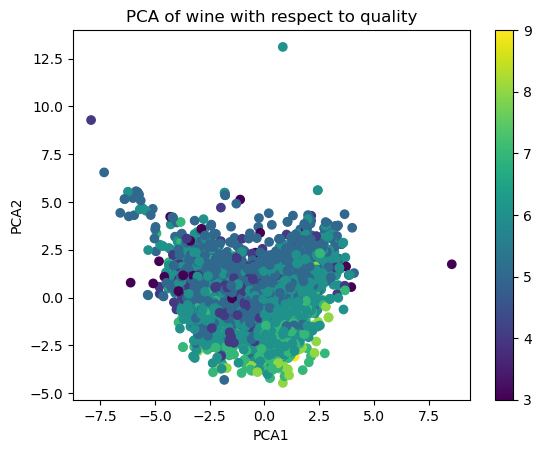

In [21]:
plt.scatter(pca_wine[:, 0], pca_wine[:, 1], c = wine_data_std["quality"])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of wine with respect to quality')
plt.colorbar()
plt.show()

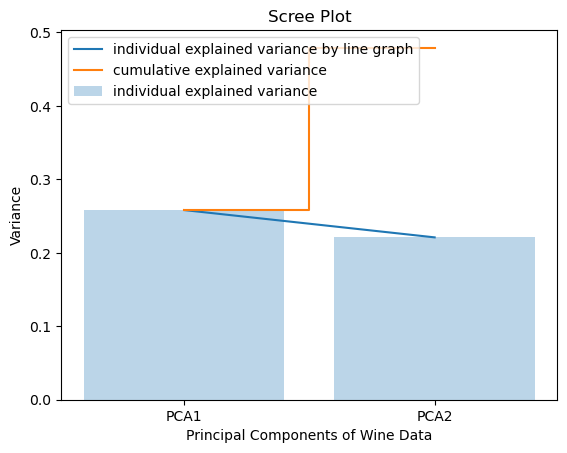

In [22]:
plt.bar(x= range(0,n), height = variance_wine, tick_label= ["PCA1", "PCA2"],alpha=0.3, align='center', label='individual explained variance')
plt.plot(range(0,n), variance_wine, label='individual explained variance by line graph')
plt.step(range(0,n), cumSum_wine, where='mid', label='cumulative explained variance')
plt.xlabel('Principal Components of Wine Data')
plt.ylabel('Variance')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

# Q1.2) Plot and show a scree-plot to look at the cumulative variance represented by the PCA eigenvectors.

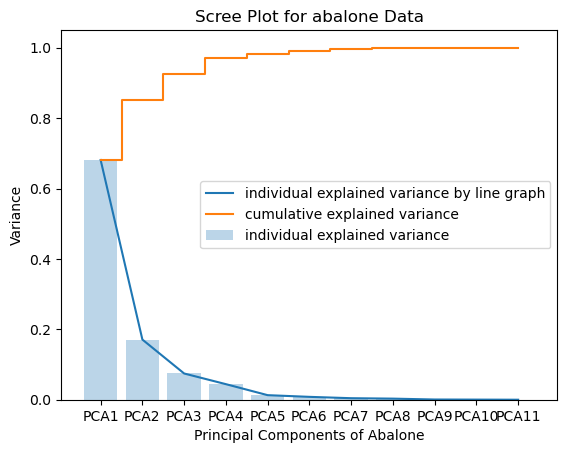

In [23]:
pca = PCA()
pca_abalone = pca.fit_transform(abalone_data_std)
variance_abalone = pca.explained_variance_ratio_
cumSum_abalone = np.cumsum(variance_abalone)
pca_abalone_df = pd.DataFrame(pca_abalone, columns = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10", "PCA11"])
plt.bar(x= range(0,11), height= variance_abalone, tick_label= ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10", "PCA11"],alpha=0.3, align='center', label='individual explained variance')
plt.plot(range(0,11), variance_abalone, label='individual explained variance by line graph')
plt.step(range(0,11), cumSum_abalone, where='mid', label='cumulative explained variance')
plt.xlabel('Principal Components of Abalone')
plt.ylabel('Variance')
plt.title('Scree Plot for abalone Data')
plt.legend(loc='best')
plt.show()

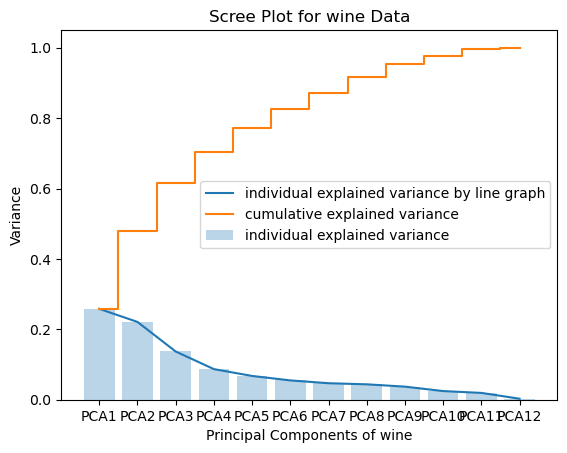

In [24]:
pca = PCA()
pca_wine = pca.fit_transform(wine_data_std)
variance_wine = pca.explained_variance_ratio_
cumSum_wine = np.cumsum(variance_wine)

pca_wine_df = pd.DataFrame(pca_wine, columns = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10", "PCA11", "PCA12"])
pca_wine_df
plt.bar(x= range(0,12), height= variance_wine, tick_label= ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10", "PCA11", "PCA12"],alpha=0.3, align='center', label='individual explained variance')
plt.plot(range(0,12), variance_wine, label='individual explained variance by line graph')
plt.step(range(0,12), cumSum_wine, where='mid', label='cumulative explained variance')
plt.xlabel('Principal Components of wine')
plt.ylabel('Variance')
plt.title('Scree Plot for wine Data')
plt.legend(loc='best')
plt.show()

From the Abalone Scree plot we can extract that the first six principle componenets has noticable variance change. As a resutl we can extract the first 6 principle compoenents

From the wine scree plot we can extract that the first 11 principle componenets has noticable variance change. As a resutl we can extract the first 11 principle compoenents 

# Q1.3) You now want to experimentally find the best reduced dimensionality for the dataset with respect to how it impacts the accuracy of a classifier

The accuracy of the for the Dimension 7 is relatively High


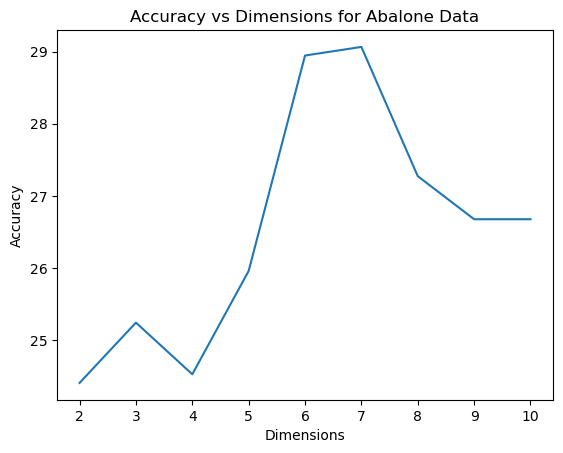

In [26]:
#Performing KNN over all dimension of abalone_data

pca_accuracies = []

x_abalone = abalone_data_std.iloc[:,:-1].values
y_abalone = abalone_data_std.iloc[:,-1].values

list_accuracies = []

for d in range(2,len(abalone_data.columns)):
    pcaknn = PCA(n_components=d)
    knn = KNeighborsClassifier(n_neighbors = 66, weights = 'distance', p=1)
    x_pca = pcaknn.fit_transform(x_abalone)
    x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_abalone, test_size=0.2, random_state=122)
    knn.fit(x_train_pca, y_train_pca)
    y_pred = knn.predict(x_test_pca)
    final = accuracy_score(y_test_pca, y_pred)*100
    list_accuracies.append(final)

optimal_dimension_abalone = list_accuracies.index(max(list_accuracies))+2
pca_accuracies.append(max(list_accuracies))
print("The accuracy of the for the Dimension", optimal_dimension_abalone, "is relatively High")
plt.plot(range(2,len(abalone_data.columns)),list_accuracies)
plt.xlabel('Dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Dimensions for Abalone Data')
plt.show()

In [62]:
pca = PCA(n_components = optimal_dimension_abalone)
abalone_PCA = pca.fit_transform(abalone_data_std.iloc[:,:-1])
PCA_extracted_abalone = pd.DataFrame(abalone_PCA, columns = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7"])
PCA_extracted_abalone

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,-2.970911,-1.549257,-1.653497,-0.144653,0.254713,-0.006374,0.043605
1,-0.165963,1.484654,-1.146611,0.162327,-0.417532,-0.072743,0.004786
2,-1.207103,-1.509290,-1.103692,0.189678,-0.004758,0.001609,-0.010124
3,-4.021094,0.183908,0.557780,-0.243702,0.270636,-0.014646,0.024854
4,-2.959579,0.209669,0.891912,-0.126887,-0.062183,-0.128055,-0.050132
...,...,...,...,...,...,...,...
4171,1.055317,1.505948,-0.759118,0.313560,-0.042995,0.197894,-0.338645
4172,0.911554,-1.483188,-0.390701,-0.318016,-0.301704,0.099784,-0.029791
4173,2.290289,-1.444003,0.009219,0.756534,0.383491,0.363008,-0.217936
4174,1.858822,1.502005,-0.457882,-0.363716,-0.284796,0.265527,-0.033682


The accuracy of the for the Dimension 11 is relatively High


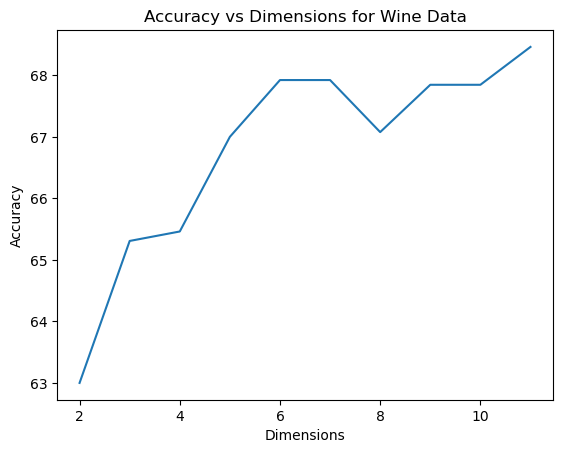

In [27]:
#Performing KNN over all dimension of wine_data

x_wine = wine_data_std.iloc[:,:-1].values
y_wine = wine_data_std.iloc[:,-1].values

list_accuracies = []

for d in range(2,len(wine_data.columns)):
    pcaknn = PCA(n_components=d)
    knn = KNeighborsClassifier(n_neighbors = 47, weights = 'distance', p=1)
    x_pca = pcaknn.fit_transform(x_wine)
    x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_wine, test_size=0.2, random_state=122)
    knn.fit(x_train_pca, y_train_pca)
    y_pred = knn.predict(x_test_pca)
    final = accuracy_score(y_test_pca, y_pred)*100
    list_accuracies.append(final)
    
optimal_dimension_wine = list_accuracies.index(max(list_accuracies))+2
pca_accuracies.append(max(list_accuracies))
print("The accuracy of the for the Dimension", optimal_dimension_wine, "is relatively High")
plt.plot(range(2,len(wine_data.columns)),list_accuracies)
plt.xlabel('Dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Dimensions for Wine Data')
plt.show()

In [64]:
pca = PCA(n_components = optimal_dimension_wine)
wine_PCA = pca.fit_transform(wine_data_std.iloc[:,:-1])
PCA_extracted_wine = pd.DataFrame(wine_PCA, columns = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
PCA_extracted_wine

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-3.205996,0.416523,-2.722237,-0.796778,0.202877,-0.227363,-0.325554,-0.567278,0.071229,-0.108046,0.027460
1,-3.039051,1.107462,-2.046952,-0.770225,-1.322655,1.655121,0.059559,-0.514603,-0.429129,-0.268149,-0.015471
2,-3.071893,0.878964,-1.742580,-0.802257,-0.762112,0.848374,0.167670,-0.420952,-0.271032,-0.086832,0.054146
3,-1.571262,2.112545,2.592917,-0.292785,0.604701,-0.713308,-0.851217,-0.929669,0.549410,0.116660,-0.103745
4,-3.205996,0.416523,-2.722237,-0.796778,0.202877,-0.227363,-0.325554,-0.567278,0.071229,-0.108046,0.027460
...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.062824,-1.934205,0.223912,0.189443,0.000146,-0.629250,0.367168,-0.048457,0.070114,-0.102160,-0.012106
6493,1.866989,0.524431,-0.431798,0.183000,-0.518028,0.188672,-0.372130,-0.236534,-0.122212,-0.479837,-0.080560
6494,0.571133,-0.722662,0.091469,-0.939670,-1.262008,-0.553014,1.047896,-1.068127,-0.133957,-0.356173,0.158103
6495,0.090052,-3.545780,0.141195,-0.055725,0.208807,-0.148921,-0.380177,0.638527,-0.255940,0.266327,0.054196


In [65]:
q1.append(pca_accuracies)

# Linear Discriminent Analysis

The accuracy of the for the Componenets 4 is relatively High


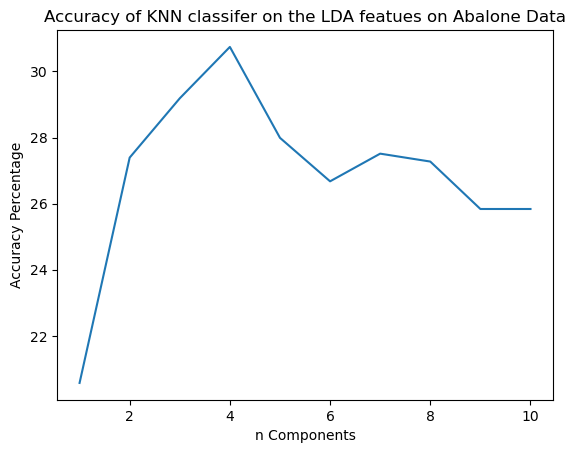

In [66]:
# Linear Discriminent Analysis on abalone data

lda_accuracies = []

x_abalone = abalone_data_std.iloc[:,:-1].values
y_abalone = abalone_data_std.iloc[:,-1].values

lda_accu_abalone = []
for i in range(1, len(abalone_data.columns)):
    lda = LinearDiscriminantAnalysis(n_components = i)
    x_lda_abalone = lda.fit_transform(x_abalone, y_abalone)
    x_train, x_test, y_train, y_test = train_test_split(x_lda_abalone, y_abalone, test_size=0.2, random_state=122)
    knn_lda = KNeighborsClassifier(n_neighbors = 66, weights = 'distance', p=1)
    knn_lda.fit(x_train, y_train)
    pred = knn_lda.predict(x_test)
    accu_lda = accuracy_score(y_test, pred)*100
    lda_accu_abalone.append(accu_lda)

optimal_components_abalone = lda_accu_abalone.index(max(lda_accu_abalone))+1
lda_accuracies.append(max(lda_accu_abalone))
print("The accuracy of the for the Componenets", optimal_components_abalone, "is relatively High")

plt.plot(range(1,len(abalone_data.columns)), lda_accu_abalone)
plt.xlabel("n Components")
plt.ylabel("Accuracy Percentage")
plt.title("Accuracy of KNN classifer on the LDA featues on Abalone Data")
plt.show()

In [67]:
#Extracting the optimal LDA Abalone Data
lda = LinearDiscriminantAnalysis(n_components = optimal_components_abalone)
abalone_lda = lda.fit_transform(abalone_data, abalone_data.iloc[:,-1])
LDA_extracted_abalone = pd.DataFrame(abalone_lda, columns = ["Comp1","Comp2","Comp3" ,"Comp4"])
LDA_extracted_abalone

,Comp1,Comp2,Comp3,Comp4
0,-1.839061,-0.360468,-0.541921,-0.113868
1,0.960408,0.203381,0.676947,-0.508147
2,-0.276916,-0.093953,-0.169981,-0.628371
3,-2.925311,-0.525417,0.269900,-0.294369
4,-1.738732,0.065112,0.970384,0.675972
...,...,...,...,...
4171,1.021541,0.575464,-0.471510,-0.836173
4172,0.681774,0.907393,-0.248530,0.285743
4173,1.163890,0.415261,-0.678530,-0.905748
4174,0.946575,1.471072,-1.040805,0.599154


The accuracy of the for the Componenets 6 is relatively High


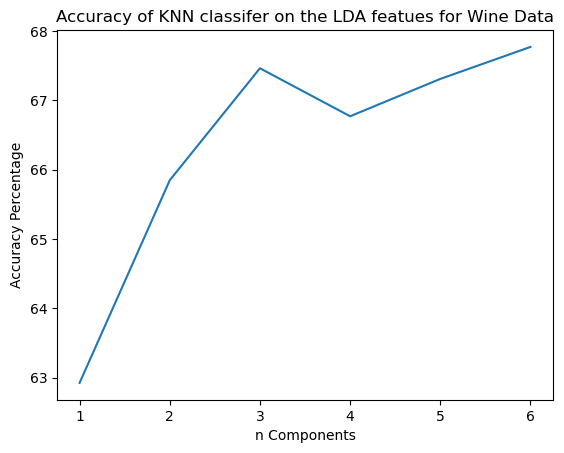

In [68]:
# LDA and Knn on wine data

x_wine = wine_data_std.iloc[:,:-1].values
y_wine = wine_data_std.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.2, random_state=122)

lda_accu_wine = []
for i in range(1, 7):
    lda = LinearDiscriminantAnalysis(n_components = i)
    x_train_lda = lda.fit_transform(x_train, y_train)
    x_test_lda = lda.transform(x_test)
    knn_lda = KNeighborsClassifier(n_neighbors = 59, weights = 'distance', p=1)
    knn_lda.fit(x_train_lda, y_train)
    lda_pred = knn_lda.predict(x_test_lda)
    accu_lda = accuracy_score(y_test, lda_pred)*100
    lda_accu_wine.append(accu_lda)
    
optimal_components_wine = lda_accu_wine.index(max(lda_accu_wine))+1
lda_accuracies.append(max(lda_accu_wine))
print("The accuracy of the for the Componenets", optimal_components_wine, "is relatively High")

plt.plot(range(1,7), lda_accu_wine)
plt.xlabel("n Components")
plt.ylabel("Accuracy Percentage")
plt.title("Accuracy of KNN classifer on the LDA featues for Wine Data")
plt.show()

q1.append(lda_accuracies)

In [69]:
#Extracting the optimal LDA Abalone Data
lda = LinearDiscriminantAnalysis(n_components = optimal_components_wine)
wine_lda = lda.fit_transform(wine_data_std, wine_data_std.iloc[:,-1])
LDA_extracted_wine = pd.DataFrame(wine_lda, columns = ["Comp1","Comp2","Comp3" ,"Comp4","Comp5","Comp6"])
LDA_extracted_wine

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6
0,2.025316,0.761458,0.289839,-0.737491,1.079172,1.279620
1,2.206216,1.777669,-0.685095,0.010673,-1.156573,2.342064
2,1.937528,1.105992,0.075147,-0.232970,-0.494475,1.987551
3,0.317118,-0.334990,-0.269036,-2.793312,0.789982,-0.779064
4,2.025316,0.761458,0.289839,-0.737491,1.079172,1.279620
...,...,...,...,...,...,...
6492,-0.906529,-0.156438,0.871373,0.044327,0.416964,-0.031451
6493,0.577019,-0.069377,-1.155257,0.578808,-0.245181,-0.570327
6494,1.049763,-0.940079,1.236657,0.445025,-0.094818,0.986873
6495,-1.622771,1.111509,0.864277,0.997102,0.594441,-0.178843


# Q1.4) Try using the t-SNE method to visualize the datasets by producing a 2D plot, comment on any useful patterns that this shows.

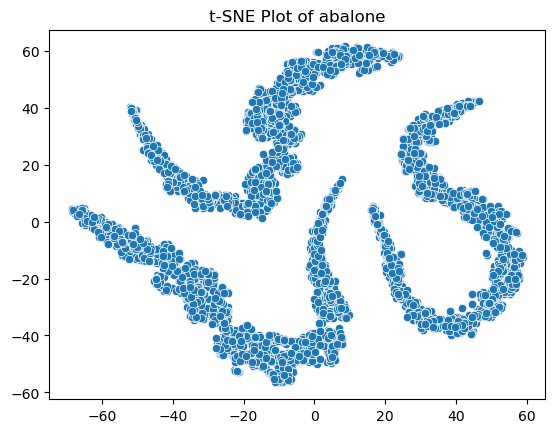

In [70]:
m = TSNE (learning_rate = 50)
tsne_featues_abalone = m.fit_transform(abalone_data.iloc[:,:-1])
sns.scatterplot(tsne_featues_abalone[:, 0], tsne_featues_abalone[:, 1])
plt.title("t-SNE Plot of abalone")
plt.show()

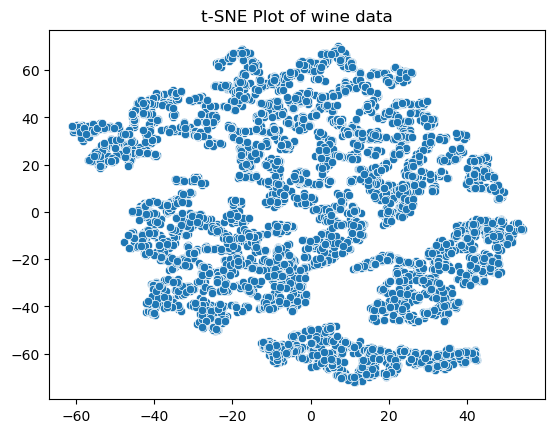

In [71]:
m = TSNE (learning_rate = 50)
tsne_featues_abalone = m.fit_transform(wine_data.iloc[:,:-1])
sns.scatterplot(tsne_featues_abalone[:, 0], tsne_featues_abalone[:, 1])
plt.title("t-SNE Plot of wine data")
plt.show()

In [72]:
q1

[[29.30622009569378, 69.38461538461539],
 [29.066985645933013, 68.46153846153847],
 [30.741626794258377, 67.76923076923077]]

In [73]:
Question1_final = pd.DataFrame(q1, columns = ["Abalone Dataset", "Wine Dataset"], index = ["Raw Dataset", "PCA Extracted Dataset", "LDA Extracted Dataset"]).T
Question1_final

,Raw Dataset,PCA Extracted Dataset,LDA Extracted Dataset
Abalone Dataset,29.306220,29.066986,30.741627
Wine Dataset,69.384615,68.461538,67.769231


In [74]:
wine = (pd.DataFrame(Question1_final.loc['Wine Dataset'])).T
wine = wine.rename(index = {'Wine Dataset' : 'Knn'}, columns = {'Raw Dataset' : 'Raw Wine', 'PCA Extracted Dataset':'PCA Extracted Wine', 'LDA Extracted Dataset': 'LDA Extracted Wine'})
abalone = pd.DataFrame(Question1_final.loc['Abalone Dataset']).T
abalone = abalone.rename(index = {'Abalone Dataset' : 'Knn'}, columns = {'Raw Dataset' : 'Raw Abalone', 'PCA Extracted Dataset':'PCA Extracted Abalone', 'LDA Extracted Dataset': 'LDA Extracted Abalone'})

In [75]:
abalone

,Raw Abalone,PCA Extracted Abalone,LDA Extracted Abalone
Knn,29.30622,29.066986,30.741627


In [76]:
wine

,Raw Wine,PCA Extracted Wine,LDA Extracted Wine
Knn,69.384615,68.461538,67.769231


# Feature Extraction Datasets

In [77]:
PCA_extracted_abalone

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,-2.970911,-1.549257,-1.653497,-0.144653,0.254713,-0.006374,0.043605
1,-0.165963,1.484654,-1.146611,0.162327,-0.417532,-0.072743,0.004786
2,-1.207103,-1.509290,-1.103692,0.189678,-0.004758,0.001609,-0.010124
3,-4.021094,0.183908,0.557780,-0.243702,0.270636,-0.014646,0.024854
4,-2.959579,0.209669,0.891912,-0.126887,-0.062183,-0.128055,-0.050132
...,...,...,...,...,...,...,...
4171,1.055317,1.505948,-0.759118,0.313560,-0.042995,0.197894,-0.338645
4172,0.911554,-1.483188,-0.390701,-0.318016,-0.301704,0.099784,-0.029791
4173,2.290289,-1.444003,0.009219,0.756534,0.383491,0.363008,-0.217936
4174,1.858822,1.502005,-0.457882,-0.363716,-0.284796,0.265527,-0.033682


In [78]:
PCA_extracted_wine

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-3.205996,0.416523,-2.722237,-0.796778,0.202877,-0.227363,-0.325554,-0.567278,0.071229,-0.108046,0.027460
1,-3.039051,1.107462,-2.046952,-0.770225,-1.322655,1.655121,0.059559,-0.514603,-0.429129,-0.268149,-0.015471
2,-3.071893,0.878964,-1.742580,-0.802257,-0.762112,0.848374,0.167670,-0.420952,-0.271032,-0.086832,0.054146
3,-1.571262,2.112545,2.592917,-0.292785,0.604701,-0.713308,-0.851217,-0.929669,0.549410,0.116660,-0.103745
4,-3.205996,0.416523,-2.722237,-0.796778,0.202877,-0.227363,-0.325554,-0.567278,0.071229,-0.108046,0.027460
...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.062824,-1.934205,0.223912,0.189443,0.000146,-0.629250,0.367168,-0.048457,0.070114,-0.102160,-0.012106
6493,1.866989,0.524431,-0.431798,0.183000,-0.518028,0.188672,-0.372130,-0.236534,-0.122212,-0.479837,-0.080560
6494,0.571133,-0.722662,0.091469,-0.939670,-1.262008,-0.553014,1.047896,-1.068127,-0.133957,-0.356173,0.158103
6495,0.090052,-3.545780,0.141195,-0.055725,0.208807,-0.148921,-0.380177,0.638527,-0.255940,0.266327,0.054196


In [79]:
LDA_extracted_abalone

,Comp1,Comp2,Comp3,Comp4
0,-1.839061,-0.360468,-0.541921,-0.113868
1,0.960408,0.203381,0.676947,-0.508147
2,-0.276916,-0.093953,-0.169981,-0.628371
3,-2.925311,-0.525417,0.269900,-0.294369
4,-1.738732,0.065112,0.970384,0.675972
...,...,...,...,...
4171,1.021541,0.575464,-0.471510,-0.836173
4172,0.681774,0.907393,-0.248530,0.285743
4173,1.163890,0.415261,-0.678530,-0.905748
4174,0.946575,1.471072,-1.040805,0.599154


In [80]:
LDA_extracted_wine

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6
0,2.025316,0.761458,0.289839,-0.737491,1.079172,1.279620
1,2.206216,1.777669,-0.685095,0.010673,-1.156573,2.342064
2,1.937528,1.105992,0.075147,-0.232970,-0.494475,1.987551
3,0.317118,-0.334990,-0.269036,-2.793312,0.789982,-0.779064
4,2.025316,0.761458,0.289839,-0.737491,1.079172,1.279620
...,...,...,...,...,...,...
6492,-0.906529,-0.156438,0.871373,0.044327,0.416964,-0.031451
6493,0.577019,-0.069377,-1.155257,0.578808,-0.245181,-0.570327
6494,1.049763,-0.940079,1.236657,0.445025,-0.094818,0.986873
6495,-1.622771,1.111509,0.864277,0.997102,0.594441,-0.178843


# Performing the Normalization on the Extracted datasets

In [81]:
PCA_extracted_abalone_mms = mms.fit_transform(PCA_extracted_abalone)
PCA_extracted_abalone_mms = pd.DataFrame(PCA_extracted_abalone_mms, columns = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7"])
PCA_extracted_abalone_mms

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,0.242029,0.019946,0.119431,0.129628,0.192250,0.436188,0.467623
1,0.426454,0.877942,0.207996,0.142336,0.117877,0.427529,0.454083
2,0.357999,0.031248,0.215495,0.143468,0.163544,0.437230,0.448882
3,0.172980,0.510088,0.505793,0.125528,0.194012,0.435109,0.461083
4,0.242774,0.517374,0.564174,0.130364,0.157191,0.420312,0.434927
...,...,...,...,...,...,...,...
4171,0.506753,0.883964,0.275700,0.148596,0.159314,0.462841,0.334291
4172,0.497301,0.038630,0.340071,0.122452,0.130692,0.450040,0.442022
4173,0.587952,0.049712,0.409947,0.166933,0.206497,0.484384,0.376395
4174,0.559583,0.882849,0.328333,0.120560,0.132562,0.471665,0.440665


In [82]:
PCA_extracted_wine_mms = mms.fit_transform(PCA_extracted_wine)
PCA_extracted_wine_mms = pd.DataFrame(PCA_extracted_wine_mms, columns = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
PCA_extracted_wine_mms

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.259126,0.277600,0.170251,0.185211,0.492707,0.317067,0.447219,0.291438,0.498507,0.468340,0.278076
1,0.269440,0.315838,0.232157,0.187327,0.409180,0.551694,0.485547,0.295810,0.424632,0.440975,0.271067
2,0.267411,0.303192,0.260060,0.184774,0.439871,0.451143,0.496306,0.303582,0.447974,0.471966,0.282433
3,0.360120,0.371460,0.657513,0.225379,0.514708,0.256500,0.394902,0.261360,0.569109,0.506747,0.256655
4,0.259126,0.277600,0.170251,0.185211,0.492707,0.317067,0.447219,0.291438,0.498507,0.468340,0.278076
...,...,...,...,...,...,...,...,...,...,...,...
6492,0.453312,0.147508,0.440336,0.263813,0.481607,0.266977,0.516161,0.334498,0.498343,0.469346,0.271616
6493,0.572536,0.283572,0.380225,0.263300,0.453236,0.368920,0.442583,0.318889,0.469947,0.404793,0.260440
6494,0.492478,0.214557,0.428195,0.173822,0.412501,0.276479,0.583910,0.249869,0.468213,0.425930,0.299405
6495,0.462757,0.058322,0.432753,0.244273,0.493032,0.326844,0.441782,0.391516,0.450202,0.532328,0.282441


In [83]:
LDA_extracted_abalone_mms = mms.fit_transform(LDA_extracted_abalone)
LDA_extracted_abalone_mms = pd.DataFrame(LDA_extracted_abalone_mms, columns = ["Comp1","Comp2","Comp3" ,"Comp4"])
LDA_extracted_abalone_mms

,Comp1,Comp2,Comp3,Comp4
0,0.390478,0.651336,0.446218,0.453982
1,0.586805,0.689713,0.528813,0.431687
2,0.500032,0.669476,0.471422,0.424889
3,0.314299,0.640109,0.501230,0.443775
4,0.397514,0.680302,0.548698,0.498645
...,...,...,...,...
4171,0.591093,0.715039,0.450990,0.413138
4172,0.567265,0.737631,0.466100,0.476579
4173,0.601076,0.704135,0.436961,0.409204
4174,0.585835,0.775997,0.412412,0.494301


In [84]:
LDA_extracted_wine_mms = mms.fit_transform(LDA_extracted_wine)
LDA_extracted_wine_mms = pd.DataFrame(LDA_extracted_wine_mms, columns = ["Comp1","Comp2","Comp3" ,"Comp4","Comp5","Comp6"])
LDA_extracted_wine_mms

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6
0,0.751364,0.634315,0.861580,0.337383,0.858659,0.545081
1,0.771371,0.685166,0.804784,0.379519,0.684312,0.622396
2,0.741655,0.651556,0.849073,0.365797,0.735943,0.596598
3,0.562444,0.579450,0.829022,0.221599,0.836108,0.395268
4,0.751364,0.634315,0.861580,0.337383,0.858659,0.545081
...,...,...,...,...,...,...
6492,0.427113,0.588384,0.895459,0.381415,0.807019,0.449673
6493,0.591188,0.592741,0.777393,0.411517,0.755384,0.410458
6494,0.643472,0.549171,0.916739,0.403982,0.767109,0.523777
6495,0.347900,0.651832,0.895046,0.435075,0.820859,0.438947


In [85]:
PCA_extracted_abalone_std = pd.DataFrame(sc.fit_transform(PCA_extracted_abalone), columns = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7"])
PCA_extracted_wine_std = pd.DataFrame(sc.fit_transform(PCA_extracted_wine), columns = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
LDA_extracted_abalone_std = pd.DataFrame(sc.fit_transform(LDA_extracted_abalone), columns = ["Comp1","Comp2","Comp3" ,"Comp4"])
LDA_extracted_wine_std = pd.DataFrame(sc.fit_transform(LDA_extracted_wine), columns = ["Comp1","Comp2","Comp3" ,"Comp4","Comp5","Comp6"])

In [86]:
abalone_class = abalone_data.iloc[:,-1].values
wine_class = wine_data.iloc[:,-1].values

# Q.2) Naive Bayes Classifier

In [87]:
#Abalone Raw Data

x_NB = abalone_data_mms.iloc[:,:-1].values
y_NB = abalone_data_mms.iloc[:,-1].values

#Complement Naive Bayes
cNB = ComplementNB()

#Multinomial Naive Bayes
mNB = MultinomialNB()

#Gaussian Naive Bayes
gNB = GaussianNB() 

In [88]:
#Complement Naive Bayes

def CNB_cross_val(x,y):
    scores = cross_val_score(cNB, x, y, cv=5, scoring = 'accuracy')
    mean = scores.mean()*100
    return mean

In [89]:
cnb_raw_abalone = CNB_cross_val(abalone_data_mms.iloc[:,:-1], abalone_class)
cnb_raw_wine = CNB_cross_val(wine_data_mms.iloc[:,:-1], wine_class)
cnb_pca_abalone = CNB_cross_val(PCA_extracted_abalone_mms, abalone_class)
cnb_pca_wine = CNB_cross_val(PCA_extracted_wine_mms, wine_class)
cnb_lda_abalone = CNB_cross_val(LDA_extracted_abalone_mms, abalone_class)
cnb_lda_wine = CNB_cross_val(LDA_extracted_wine_mms, wine_class)

In [90]:
cnb_wine = [cnb_raw_wine, cnb_pca_wine, cnb_lda_wine]
cnb_abalone = [cnb_raw_abalone, cnb_pca_abalone, cnb_lda_abalone]

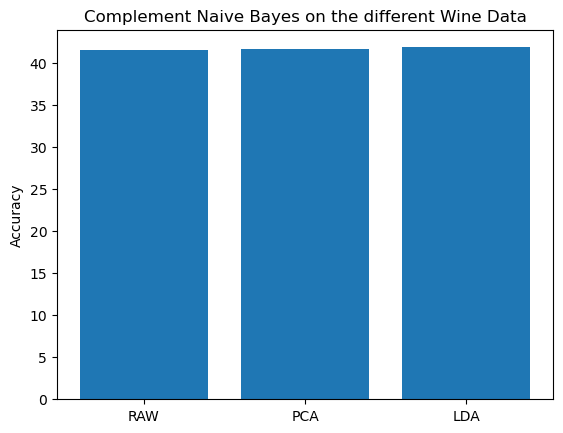

In [91]:
plt.bar(x= range(0,3), height = cnb_wine, tick_label= ["RAW", "PCA", "LDA"])
plt.ylabel("Accuracy")
plt.title("Complement Naive Bayes on the different Wine Data")
plt.show()

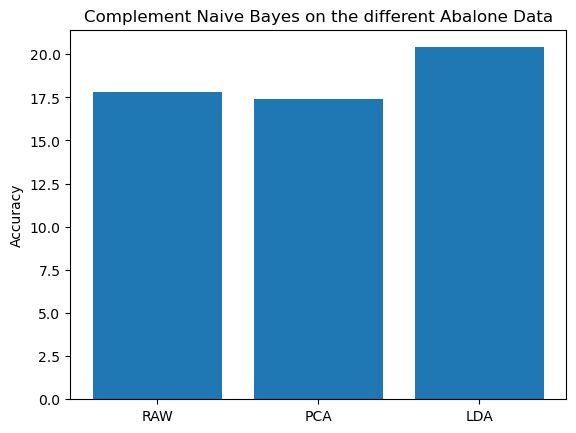

In [92]:
plt.bar(x= range(0,3), height = cnb_abalone, tick_label= ["RAW", "PCA", "LDA"])
plt.ylabel("Accuracy")
plt.title("Complement Naive Bayes on the different Abalone Data")
plt.show()

In [93]:
#Multinomial Naive Bayes

In [94]:
def MNB_cross_val(x,y):
    scores = cross_val_score(mNB, x, y, cv=5, scoring = 'accuracy')
    mean = scores.mean()*100
    return mean

In [95]:
mnb_raw_abalone = MNB_cross_val(abalone_data_mms.iloc[:,:-1], abalone_class)
mnb_raw_wine = MNB_cross_val(wine_data_mms.iloc[:,:-1], wine_class)
mnb_pca_abalone = MNB_cross_val(PCA_extracted_abalone_mms, abalone_class)
mnb_pca_wine = MNB_cross_val(PCA_extracted_wine_mms, wine_class)
mnb_lda_abalone = MNB_cross_val(LDA_extracted_abalone_mms, abalone_class)
mnb_lda_wine = MNB_cross_val(LDA_extracted_wine_mms, wine_class)

In [96]:
mnb_wine = [mnb_raw_wine, mnb_pca_wine, mnb_lda_wine]
mnb_abalone = [mnb_raw_abalone, mnb_pca_abalone, mnb_lda_abalone]

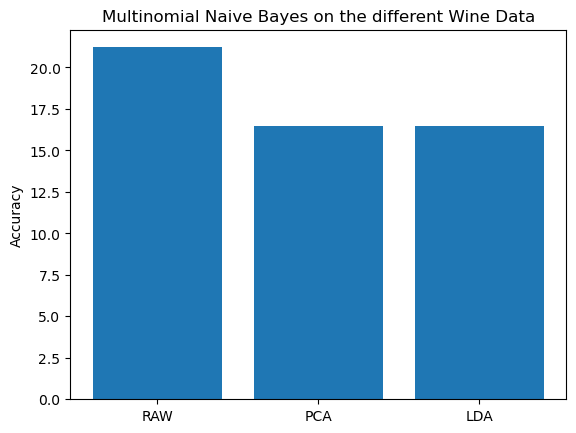

In [97]:
plt.bar(x= range(0,3), height = mnb_abalone, tick_label= ["RAW", "PCA", "LDA"])
plt.ylabel("Accuracy")
plt.title("Multinomial Naive Bayes on the different Wine Data")
plt.show()

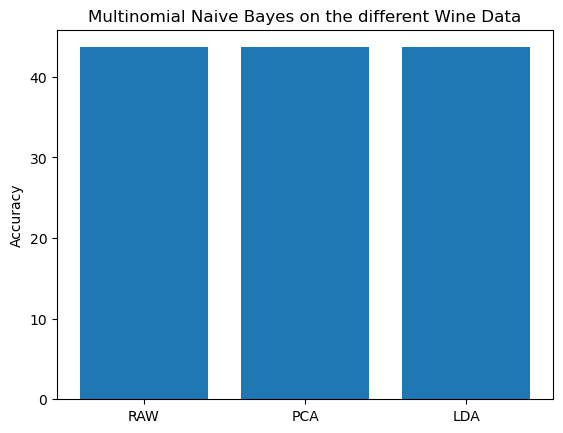

In [98]:
plt.bar(x= range(0,3), height = mnb_wine, tick_label= ["RAW", "PCA", "LDA"])
plt.ylabel("Accuracy")
plt.title("Multinomial Naive Bayes on the different Wine Data")
plt.show()

In [99]:
#Gaussian Naive Bayes

In [100]:
 def gNB_cross_val(x,y):
    scores = cross_val_score(gNB, x, y, cv=5, scoring = 'accuracy')
    mean = scores.mean()*100
    return mean

In [101]:
gnb_raw_abalone = gNB_cross_val(abalone_data_mms.iloc[:,:-1], abalone_class)
gnb_raw_wine = gNB_cross_val(wine_data_mms.iloc[:,:-1], wine_class)
gnb_pca_abalone = gNB_cross_val(PCA_extracted_abalone_mms, abalone_class)
gnb_pca_wine = gNB_cross_val(PCA_extracted_wine_mms, wine_class)
gnb_lda_abalone = gNB_cross_val(LDA_extracted_abalone_mms, abalone_class)
gnb_lda_wine = gNB_cross_val(LDA_extracted_wine_mms, wine_class)

In [102]:
gnb_wine = [gnb_raw_wine, gnb_pca_wine, gnb_lda_wine]
gnb_abalone = [gnb_raw_abalone, gnb_pca_abalone, gnb_lda_abalone]

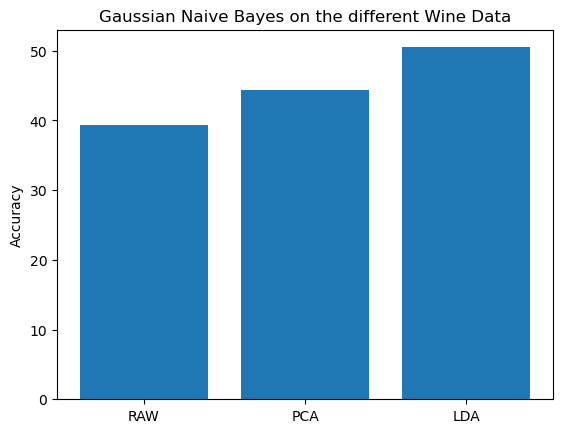

In [103]:
plt.bar(x= range(0,3), height = gnb_wine, tick_label= ["RAW", "PCA", "LDA"])
plt.ylabel("Accuracy")
plt.title("Gaussian Naive Bayes on the different Wine Data")
plt.show()

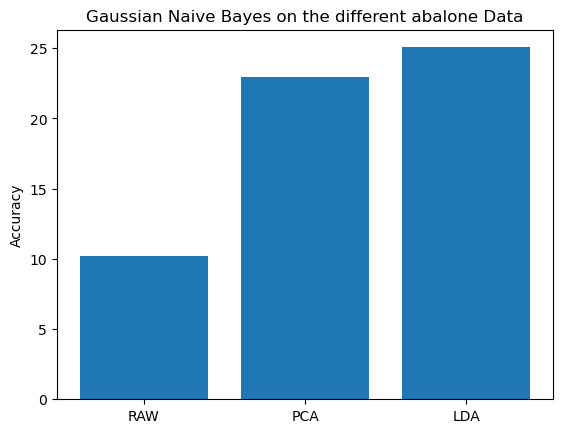

In [104]:
plt.bar(x= range(0,3), height = gnb_abalone, tick_label= ["RAW", "PCA", "LDA"])
plt.ylabel("Accuracy")
plt.title("Gaussian Naive Bayes on the different abalone Data")
plt.show()

In [105]:
mnb_abalone_pd = pd.DataFrame(mnb_abalone, index = ["Raw Abalone","PCA Extracted Abalone","LDA Extracted Abalone"], columns = ["Multinomial Naive Bayes"]).T
abalone = pd.concat([abalone, mnb_abalone_pd])

mnb_wine_pd = pd.DataFrame(mnb_wine, index = ["Raw Wine","PCA Extracted Wine","LDA Extracted Wine"], columns = ["Multinomial Naive Bayes"]).T
wine = pd.concat([wine, mnb_wine_pd])

In [106]:
wine

,Raw Wine,PCA Extracted Wine,LDA Extracted Wine
Knn,69.384615,68.461538,67.769231
Multinomial Naive Bayes,43.666311,43.650927,43.650927


In [107]:
abalone

,Raw Abalone,PCA Extracted Abalone,LDA Extracted Abalone
Knn,29.306220,29.066986,30.741627
Multinomial Naive Bayes,21.217001,16.499069,16.499069


In [108]:
cnb_abalone_pd = pd.DataFrame(cnb_abalone, index = ["Raw Abalone","PCA Extracted Abalone","LDA Extracted Abalone"], columns = ["Complement Naive Bayes"]).T
abalone = pd.concat([abalone, cnb_abalone_pd])

cnb_wine_pd = pd.DataFrame(cnb_wine, index = ["Raw Wine","PCA Extracted Wine","LDA Extracted Wine"], columns = ["Complement Naive Bayes"]).T
wine = pd.concat([wine, cnb_wine_pd])

In [109]:
wine

,Raw Wine,PCA Extracted Wine,LDA Extracted Wine
Knn,69.384615,68.461538,67.769231
Multinomial Naive Bayes,43.666311,43.650927,43.650927
Complement Naive Bayes,41.604335,41.680772,41.911447


In [110]:
abalone

,Raw Abalone,PCA Extracted Abalone,LDA Extracted Abalone
Knn,29.306220,29.066986,30.741627
Multinomial Naive Bayes,21.217001,16.499069,16.499069
Complement Naive Bayes,17.816520,17.409248,20.402630


Gaussian Navie Bayes produced better accuracy that other in dimensional reduction dataset

The performance of multinomial Naive Bayes is low on dimensional reduced dataset of abalone , while in dimensional reduced wine dataset the complement naive bayes performs low

This is because the higher the dataset the probability is distributed over a large space, and the complement naive bayes produce the lesser accuracy

While the gaussian distribution work well on the probabilistic statistics and the lesser dimension can even produce the better accuracies

# Q.3) Decision Trees Classifier

In [111]:
DTC = DecisionTreeClassifier()

In [112]:
def DTreeC(x,y,z):
    md = {'max_depth' : [1,2, 3,4, 5,6, 7,8, 9, 10, 11, 12, 13, 14 ,15, None]}
    dTC_fitting = GridSearchCV(estimator = DTC, param_grid=md, cv = 5, refit='accuracy_score')
    dTC_values = dTC_fitting.fit(x, y)
    dTC_values_df = pd.DataFrame(dTC_values.cv_results_)
    plt.scatter( [ None, 1,2, 3,4, 5,6, 7,8, 9, 10, 11, 12, 13, 14 ,15] , dTC_values_df["mean_test_score"])
    if(z==1):
        plt.title('Mean Accuracy vs Max Depth for Abalone Raw Data')
    elif(z==2):
        plt.title('Mean Accuracy vs Max Depth for Wine Raw Data')
    elif(z==3):
        plt.title('Mean Accuracy vs Max Depth for PCA Extracted Abalone Data')
    elif(z==4):
        plt.title('Mean Accuracy vs Max Depth for PCA Extracted Wine Data')
    elif(z==5):
        plt.title('Mean Accuracy vs Max Depth for LDA Extracted Abalone Data')
    elif(z==6):
        plt.title('Mean Accuracy vs Max Depth for LDA Extracted Wine Data')
    else:
        plt.title('Mean Accuracy vs Max Depth')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Mean Accuracy')
    plt.show()
    
    return dTC_values

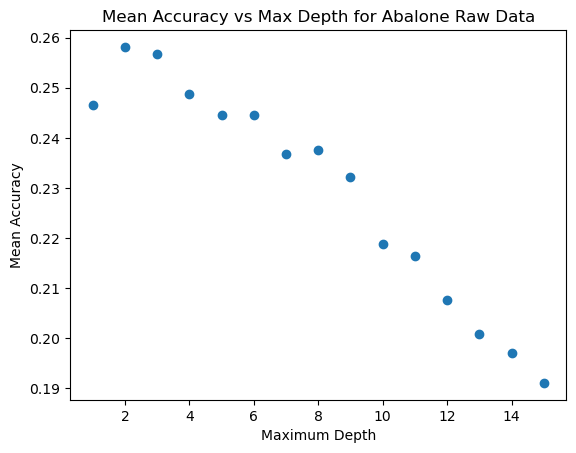

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006317,0.007746,0.003152,0.006304,1,{'max_depth': 1},0.191388,0.221557,0.205988,0.210778,0.222754,0.210493,0.011473,12
1,0.014612,0.003326,0.001168,0.002336,2,{'max_depth': 2},0.206938,0.273054,0.232335,0.262275,0.258683,0.246657,0.023950,4
2,0.015717,0.005887,0.003137,0.006273,3,{'max_depth': 3},0.240431,0.282635,0.234731,0.262275,0.270659,0.258146,0.018086,1
3,0.025180,0.007620,0.004234,0.006093,4,{'max_depth': 4},0.232057,0.274251,0.241916,0.258683,0.276647,0.256711,0.017525,2
4,0.028555,0.004007,0.000916,0.001832,5,{'max_depth': 5},0.227273,0.247904,0.243114,0.243114,0.282635,0.248808,0.018296,3
5,0.026688,0.007960,0.002680,0.005360,6,{'max_depth': 6},0.202153,0.252695,0.241916,0.258683,0.267066,0.244502,0.022704,5
6,0.035449,0.003707,0.004611,0.005956,7,{'max_depth': 7},0.206938,0.263473,0.243114,0.249102,0.259880,0.244501,0.020152,6
7,0.035040,0.006745,0.006959,0.007316,8,{'max_depth': 8},0.184211,0.240719,0.232335,0.253892,0.273054,0.236842,0.029690,8
8,0.046197,0.002090,0.001224,0.002448,9,{'max_depth': 9},0.200957,0.250299,0.221557,0.232335,0.282635,0.237557,0.027630,7
9,0.036179,0.008943,0.011035,0.006745,10,{'max_depth': 10},0.196172,0.234731,0.221557,0.244311,0.264671,0.232288,0.022885,9


In [113]:
raw_abalone_DTC = DTreeC(abalone_data_std.iloc[:,:-1],abalone_class,1)
max_accuracy_raw_abalone_dtc = max((pd.DataFrame(raw_abalone_DTC.cv_results_))["mean_test_score"])*100
pd.DataFrame(raw_abalone_DTC.cv_results_)

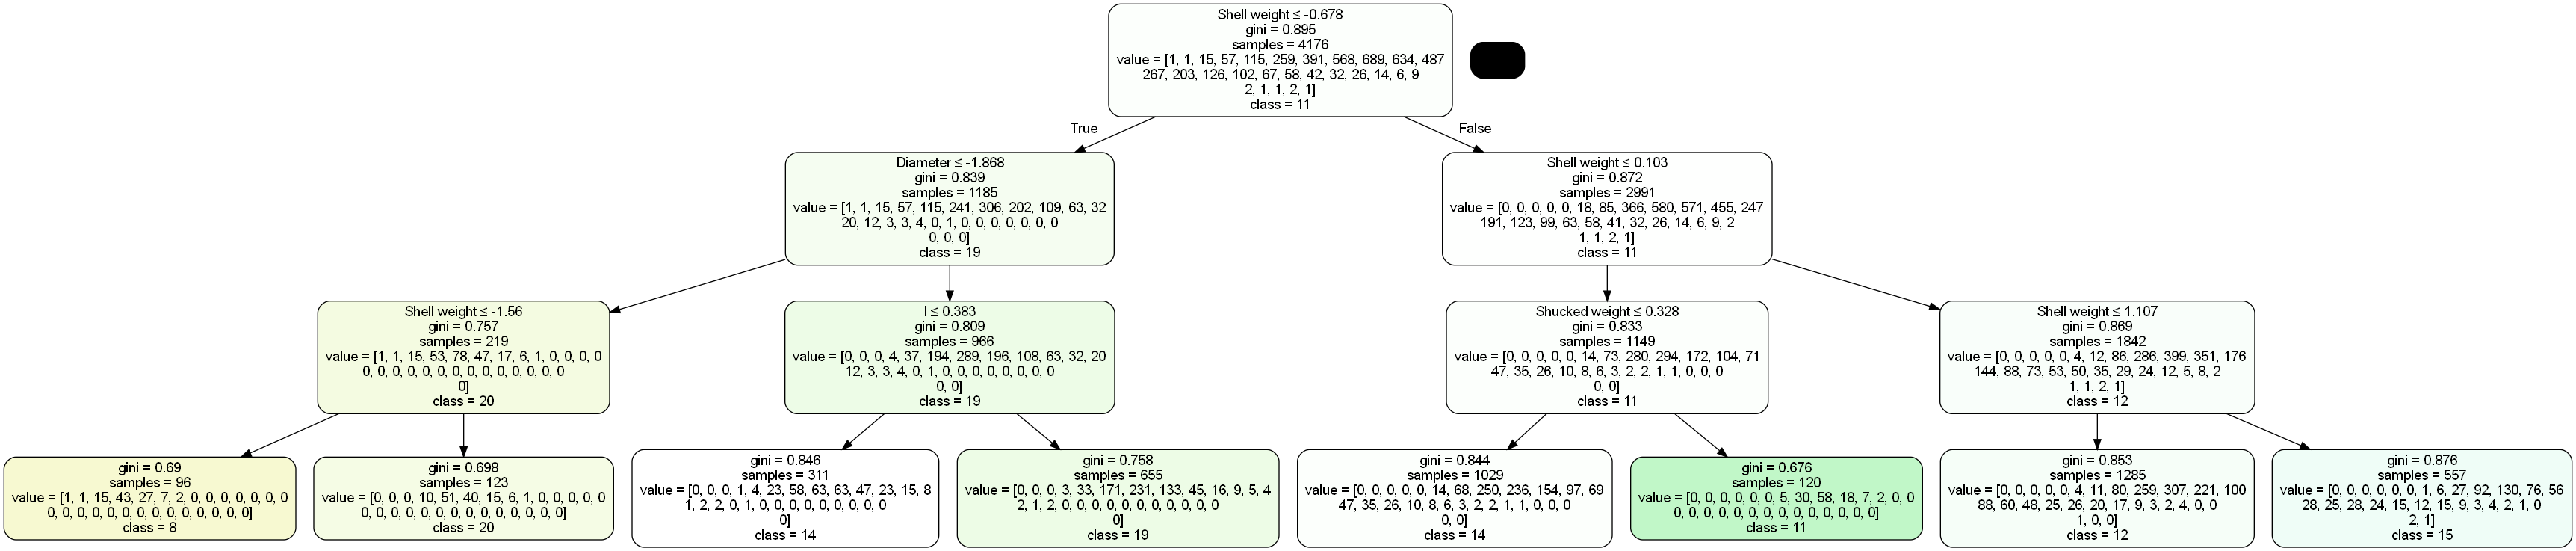

In [114]:
data = tree.export_graphviz(raw_abalone_DTC.best_estimator_, out_file = 'data.dot',
                           feature_names = abalone_data_std.iloc[:,:-1].columns,
                           class_names = abalone_data.iloc[:,-1].unique().astype(str),
                           filled=True, rounded=True, 
                            special_characters=True)

(graph,) = pydot.graph_from_dot_file("data.dot")
graph.write_png('dt.png')
Image(filename='dt.png')

Weights Columns actually plays a significant role in classifing the tree which yield the better accuracy

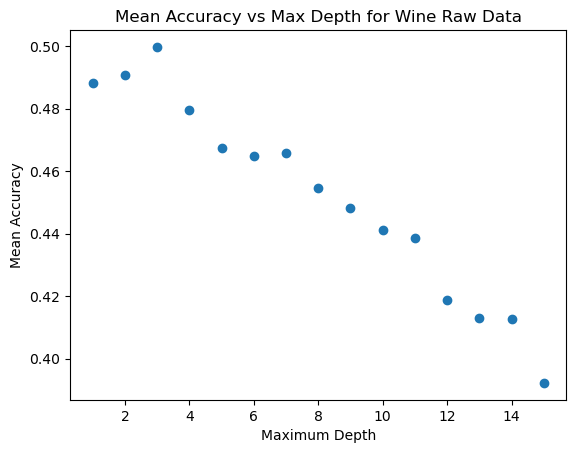

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010083,0.007125,0.000000,0.000000,1,{'max_depth': 1},0.489231,0.426923,0.451886,0.525019,0.517321,0.482076,0.037658,4
1,0.021195,0.008353,0.004003,0.006066,2,{'max_depth': 2},0.444615,0.480000,0.505004,0.522710,0.488068,0.488079,0.026230,3
2,0.024603,0.007363,0.003626,0.006074,3,{'max_depth': 3},0.446154,0.484615,0.508083,0.519630,0.494996,0.490696,0.025215,2
3,0.020893,0.010466,0.010597,0.006456,4,{'max_depth': 4},0.483846,0.446154,0.514242,0.513472,0.541186,0.499780,0.032375,1
4,0.037856,0.007737,0.003131,0.006262,5,{'max_depth': 5},0.414615,0.451538,0.501925,0.492687,0.536567,0.479466,0.042250,5
5,0.044112,0.006418,0.003122,0.006243,6,{'max_depth': 6},0.423077,0.414615,0.494226,0.483449,0.521170,0.467308,0.041519,6
6,0.053577,0.007481,0.000000,0.000000,7,{'max_depth': 7},0.399231,0.457692,0.486528,0.485758,0.494996,0.464841,0.035137,8
7,0.059681,0.006163,0.003129,0.006258,8,{'max_depth': 8},0.395385,0.452308,0.474981,0.502694,0.503464,0.465766,0.040011,7
8,0.059741,0.011800,0.006251,0.007656,9,{'max_depth': 9},0.375385,0.420769,0.461124,0.501925,0.514242,0.454689,0.051495,9
9,0.079317,0.001786,0.002449,0.004897,10,{'max_depth': 10},0.383846,0.419231,0.451116,0.488068,0.498845,0.448221,0.042763,10


In [115]:
raw_wine_DTC = DTreeC(wine_data_std.iloc[:,:-1],wine_class,2)
max_accuracy_raw_wine_dtc = max((pd.DataFrame(raw_wine_DTC.cv_results_))["mean_test_score"])*100
pd.DataFrame(raw_wine_DTC.cv_results_)

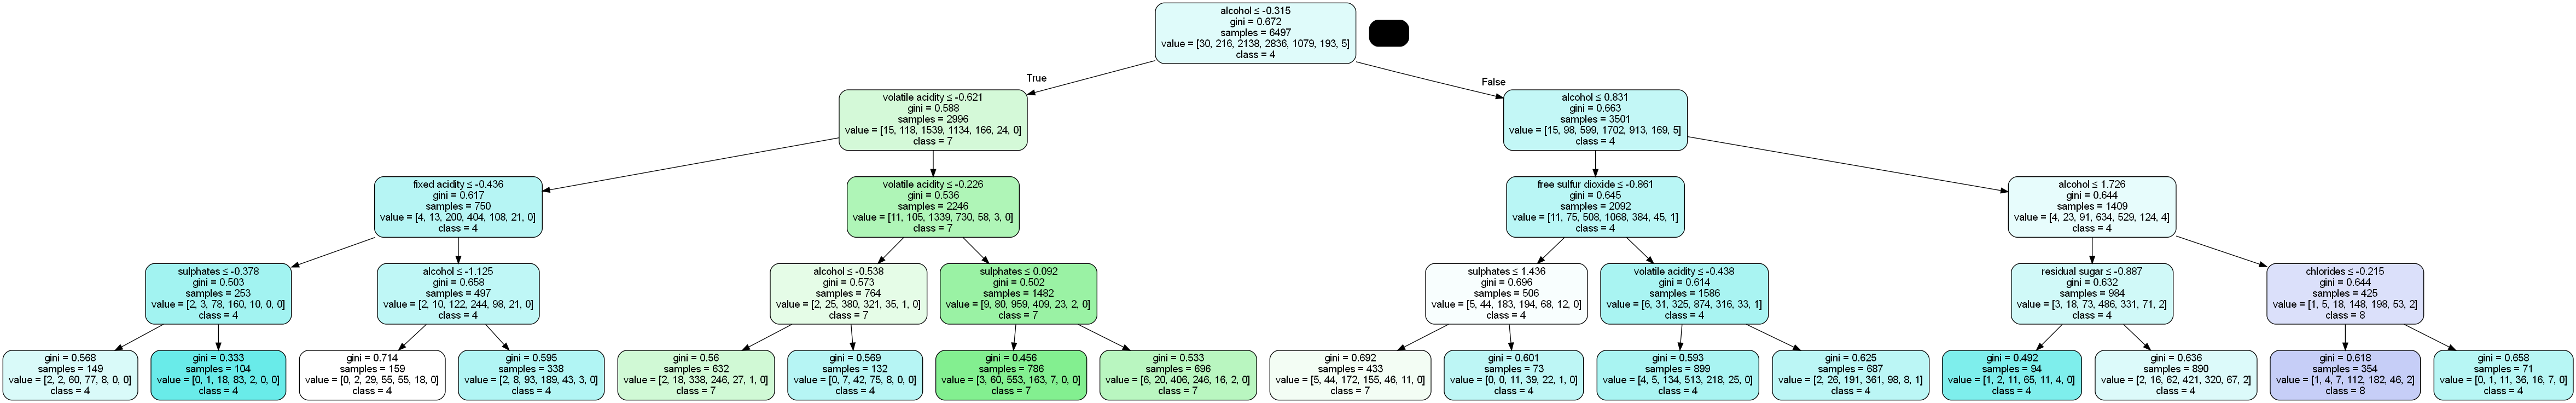

In [116]:
data = tree.export_graphviz(raw_wine_DTC.best_estimator_, out_file = 'data.dot',
                           feature_names = wine_data_std.iloc[:,:-1].columns,
                           class_names = wine_data.iloc[:,-1].unique().astype(str),
                           filled=True, rounded=True, 
                            special_characters=True)

(graph,) = pydot.graph_from_dot_file("data.dot")
graph.write_png('dt.png')
Image(filename='dt.png')

Majority of the decision are made by the acidities, sulphates, alcohols columns which yielded relatively better accuracy

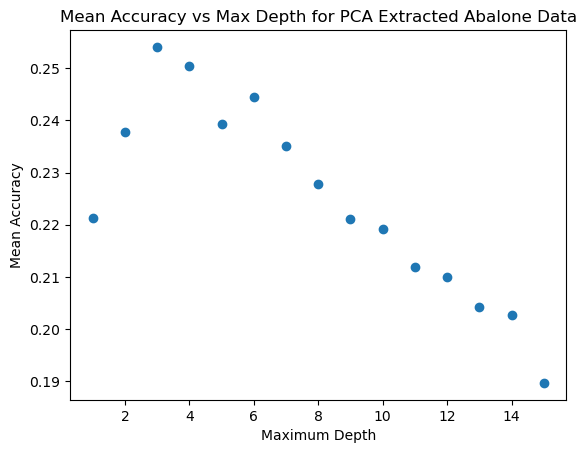

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018168,0.005173,0.000642,0.001285,1,{'max_depth': 1},0.202153,0.215569,0.201198,0.207186,0.207186,0.206658,0.005100,13
1,0.015896,0.000487,0.003125,0.006251,2,{'max_depth': 2},0.198565,0.226347,0.229940,0.225150,0.226347,0.221270,0.011466,8
2,0.025128,0.006081,0.003102,0.006203,3,{'max_depth': 3},0.240431,0.245509,0.220359,0.234731,0.247904,0.237787,0.009819,5
3,0.034084,0.007409,0.006923,0.007226,4,{'max_depth': 4},0.234450,0.255090,0.258683,0.255090,0.267066,0.254076,0.010744,1
4,0.048027,0.001765,0.002313,0.004626,5,{'max_depth': 5},0.242823,0.270659,0.232335,0.237126,0.269461,0.250481,0.016332,2
5,0.045648,0.009211,0.007809,0.006980,6,{'max_depth': 6},0.218900,0.247904,0.219162,0.243114,0.267066,0.239229,0.018337,4
6,0.059514,0.010243,0.002206,0.004411,7,{'max_depth': 7},0.226077,0.261078,0.207186,0.264671,0.263473,0.244497,0.023552,3
7,0.059509,0.006203,0.006687,0.008218,8,{'max_depth': 8},0.204545,0.259880,0.198802,0.249102,0.263473,0.235161,0.027807,6
8,0.069209,0.007497,0.000000,0.000000,9,{'max_depth': 9},0.173445,0.258683,0.210778,0.238323,0.257485,0.227743,0.032218,7
9,0.088008,0.007797,0.000000,0.000000,10,{'max_depth': 10},0.194976,0.229940,0.195210,0.240719,0.244311,0.221031,0.021700,9


In [117]:
pca_abalone_DTC = DTreeC(PCA_extracted_abalone, abalone_class,3)
max_accuracy_pca_abalone_dtc = max((pd.DataFrame(pca_abalone_DTC.cv_results_))["mean_test_score"])*100
pd.DataFrame(pca_abalone_DTC.cv_results_)

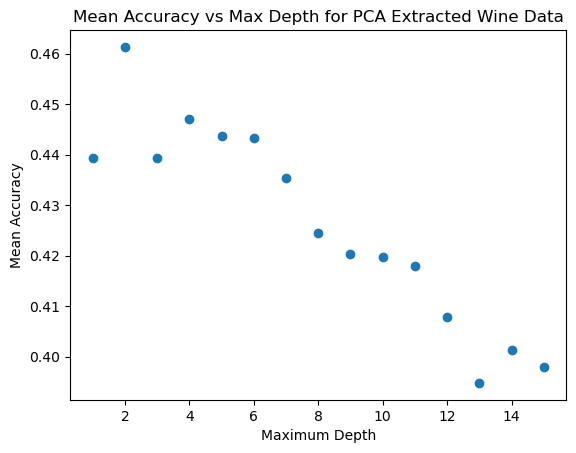

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016353,0.001157,0.006259,0.007666,1,{'max_depth': 1},0.371538,0.436154,0.421863,0.499615,0.502694,0.446373,0.049623,3
1,0.021585,0.007065,0.006276,0.007686,2,{'max_depth': 2},0.367692,0.418462,0.459584,0.470362,0.480370,0.439294,0.041533,6
2,0.043293,0.005949,0.000472,0.000944,3,{'max_depth': 3},0.406154,0.423846,0.482679,0.511932,0.481909,0.461304,0.039722,1
3,0.058731,0.010774,0.006477,0.007938,4,{'max_depth': 4},0.370769,0.418462,0.448037,0.501925,0.457275,0.439293,0.043479,7
4,0.075624,0.006388,0.000000,0.000000,5,{'max_depth': 5},0.386154,0.425385,0.438799,0.518091,0.466513,0.446988,0.043980,2
5,0.086638,0.005267,0.001745,0.003490,6,{'max_depth': 6},0.380769,0.416923,0.444188,0.498075,0.478060,0.443603,0.041988,4
6,0.095396,0.001055,0.004025,0.006079,7,{'max_depth': 7},0.369231,0.404615,0.458045,0.488838,0.495766,0.443299,0.049044,5
7,0.105444,0.003940,0.003112,0.006225,8,{'max_depth': 8},0.359231,0.403846,0.458814,0.468052,0.486528,0.435294,0.046959,8
8,0.113326,0.007071,0.000000,0.000000,9,{'max_depth': 9},0.364615,0.405385,0.448037,0.453426,0.451116,0.424516,0.034787,9
9,0.121264,0.009906,0.001322,0.002644,10,{'max_depth': 10},0.356154,0.398462,0.440339,0.454965,0.451886,0.420361,0.037928,10


In [118]:
pca_wine_DTC = DTreeC(PCA_extracted_wine, wine_class,4)
max_accuracy_pca_wine_dtc = max((pd.DataFrame(pca_wine_DTC.cv_results_))["mean_test_score"])*100
pd.DataFrame(pca_wine_DTC.cv_results_)

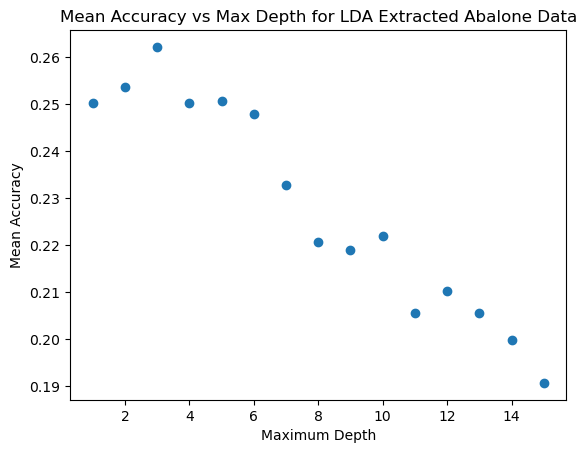

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010808,0.004022,0.001524,0.003048,1,{'max_depth': 1},0.208134,0.214371,0.203593,0.215569,0.214371,0.211208,0.004615,11
1,0.015650,0.000048,0.000000,0.000000,2,{'max_depth': 2},0.238038,0.256287,0.243114,0.261078,0.252695,0.250242,0.008482,5
2,0.015770,0.000233,0.003125,0.006250,3,{'max_depth': 3},0.222488,0.262275,0.251497,0.257485,0.274251,0.253599,0.017258,2
3,0.018492,0.003954,0.006770,0.006311,4,{'max_depth': 4},0.254785,0.268263,0.250299,0.258683,0.279042,0.262214,0.010290,1
4,0.021996,0.007557,0.003149,0.006297,5,{'max_depth': 5},0.230861,0.240719,0.244311,0.255090,0.280240,0.250244,0.016881,4
5,0.030769,0.006894,0.000530,0.001059,6,{'max_depth': 6},0.223684,0.251497,0.247904,0.265868,0.264671,0.250725,0.015255,3
6,0.031541,0.000838,0.003124,0.006248,7,{'max_depth': 7},0.226077,0.255090,0.240719,0.245509,0.271856,0.247850,0.015226,6
7,0.032843,0.002774,0.004847,0.006337,8,{'max_depth': 8},0.203349,0.235928,0.227545,0.245509,0.251497,0.232766,0.016828,7
8,0.044132,0.006764,0.000000,0.000000,9,{'max_depth': 9},0.209330,0.216766,0.208383,0.233533,0.234731,0.220549,0.011471,9
9,0.075011,0.057074,0.000535,0.001070,10,{'max_depth': 10},0.180622,0.217964,0.207186,0.247904,0.240719,0.218879,0.024169,10


In [119]:
lda_abalone_DTC = DTreeC(LDA_extracted_abalone,abalone_class,5)
max_accuracy_lda_abalone_dtc = max((pd.DataFrame(lda_abalone_DTC.cv_results_))["mean_test_score"])*100
pd.DataFrame(lda_abalone_DTC.cv_results_)

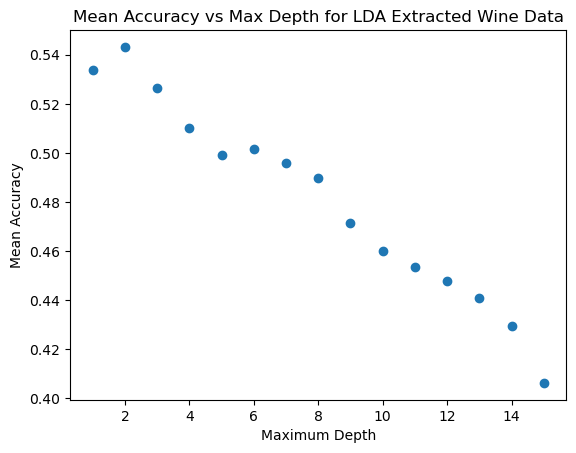

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013143,0.005480,0.002021,0.004042,1,{'max_depth': 1},0.514615,0.476923,0.539646,0.551193,0.564280,0.529332,0.030883,3
1,0.016052,0.000844,0.003143,0.006287,2,{'max_depth': 2},0.514615,0.500000,0.539646,0.551193,0.564280,0.533947,0.023563,2
2,0.024833,0.006344,0.000000,0.000000,3,{'max_depth': 3},0.528462,0.501538,0.543495,0.570439,0.571978,0.543182,0.026545,1
3,0.028342,0.006410,0.003140,0.006280,4,{'max_depth': 4},0.528462,0.470769,0.530408,0.539646,0.561971,0.526251,0.030185,4
4,0.028980,0.004957,0.005631,0.006965,5,{'max_depth': 5},0.506923,0.485385,0.533487,0.537336,0.488068,0.510240,0.021886,5
5,0.040790,0.007788,0.000000,0.000000,6,{'max_depth': 6},0.511538,0.485385,0.505774,0.528868,0.464973,0.499308,0.022081,7
6,0.043212,0.006104,0.000823,0.001646,7,{'max_depth': 7},0.502308,0.480000,0.519630,0.537336,0.468822,0.501619,0.025074,6
7,0.047305,0.000358,0.003124,0.006248,8,{'max_depth': 8},0.480000,0.481538,0.496536,0.525019,0.497306,0.496080,0.016182,8
8,0.056709,0.007525,0.000000,0.000000,9,{'max_depth': 9},0.486154,0.473846,0.485758,0.521170,0.482679,0.489921,0.016241,9
9,0.056663,0.007722,0.003148,0.006297,10,{'max_depth': 10},0.456154,0.466154,0.471132,0.505004,0.459584,0.471605,0.017485,10


In [120]:
lda_wine_DTC = DTreeC(LDA_extracted_wine.iloc[:,:-1],wine_class,6)
max_accuracy_lda_wine_dtc = max((pd.DataFrame(lda_wine_DTC.cv_results_))["mean_test_score"])*100
pd.DataFrame(lda_wine_DTC.cv_results_)

In [121]:
dtc_wine = [max_accuracy_raw_wine_dtc, max_accuracy_pca_wine_dtc ,max_accuracy_lda_wine_dtc]
dtc_abalone = [max_accuracy_raw_abalone_dtc, max_accuracy_pca_abalone_dtc, max_accuracy_lda_abalone_dtc]

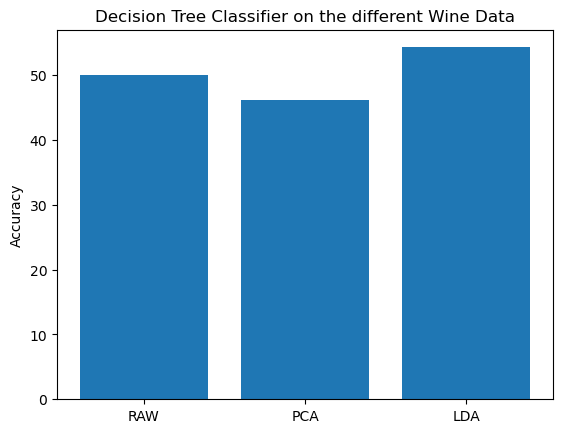

In [122]:
plt.bar(x= range(0,3), height = dtc_wine, tick_label= ["RAW", "PCA", "LDA"])
plt.ylabel("Accuracy")
plt.title("Decision Tree Classifier on the different Wine Data")
plt.show()

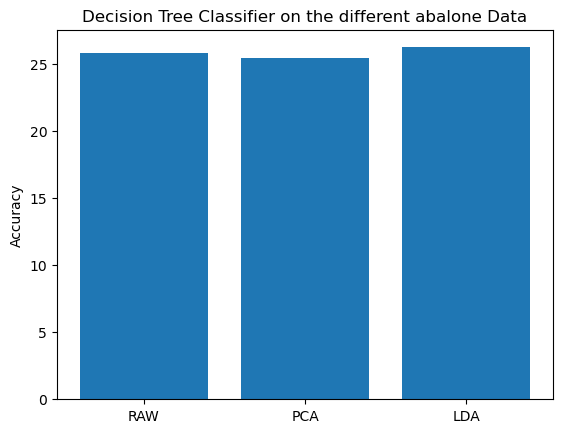

In [123]:
plt.bar(x= range(0,3), height = dtc_abalone, tick_label= ["RAW", "PCA", "LDA"])
plt.ylabel("Accuracy")
plt.title("Decision Tree Classifier on the different abalone Data")
plt.show()

In [124]:
dtc_wine_pd = pd.DataFrame(dtc_wine, index = ["Raw Wine","PCA Extracted Wine","LDA Extracted Wine"], columns = ["Decision Tree Classifier"]).T
wine = pd.concat([wine, dtc_wine_pd])

dtc_abalone_pd = pd.DataFrame(dtc_abalone, index = ["Raw Abalone","PCA Extracted Abalone","LDA Extracted Abalone"], columns = ["Decision Tree Classifier"]).T
abalone = pd.concat([abalone, dtc_abalone_pd])

In [125]:
wine

,Raw Wine,PCA Extracted Wine,LDA Extracted Wine
Knn,69.384615,68.461538,67.769231
Multinomial Naive Bayes,43.666311,43.650927,43.650927
Complement Naive Bayes,41.604335,41.680772,41.911447
Decision Tree Classifier,49.977983,46.130408,54.318245


In [126]:
abalone

,Raw Abalone,PCA Extracted Abalone,LDA Extracted Abalone
Knn,29.306220,29.066986,30.741627
Multinomial Naive Bayes,21.217001,16.499069,16.499069
Complement Naive Bayes,17.816520,17.409248,20.402630
Decision Tree Classifier,25.814600,25.407558,26.221442


# Q.4) Random Forest Classifier

In [127]:
RFC = RandomForestClassifier()
def RFclassifier(x,y,z):
    sub = {'n_estimators' : [3,30,50,150,200], 'max_depth' : [3,6,9,12]}
    RFC_cv = GridSearchCV(estimator = RFC, param_grid = sub, cv = 5, refit='accuracy_score')
    RFC_values = RFC_cv.fit(x, y)
    RFC_values_df = pd.DataFrame(RFC_values.cv_results_)
    data = np.array(RFC_values_df["mean_test_score"])*100
    data = data.reshape(4,5)
    
    if(z==1):
        plt.title('Mean Accuracy vs Max Depth Heat Plot for Abalone Raw Data')
    elif(z==2):
        plt.title('Mean Accuracy vs Max Depth Heat Plot for Wine Raw Data')
    elif(z==3):
        plt.title('Mean Accuracy vs Max Depth Heat Plot for PCA Extracted Abalone Data')
    elif(z==4):
        plt.title('Mean Accuracy vs Max Depth Heat Plot for PCA Extracted Wine Data')
    elif(z==5):
        plt.title('Mean Accuracy vs Max Depth Heat Plot for LDA Extracted Abalone Data')
    elif(z==6):
        plt.title('Mean Accuracy vs Max Depth Heat Plot for LDA Extracted Wine Data')
    else:
        plt.title('Mean Accuracy vs Max Depth Heat Plot')
    
    ax = sns.heatmap(data, annot=True, fmt='f')
    return RFC_values_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022061,0.007583,0.000000,0.000000,3,3,"{'max_depth': 3, 'n_estimators': 3}",0.220096,0.273054,0.256287,0.267066,0.273054,0.257911,0.019875,17
1,0.157002,0.000349,0.017092,0.002581,3,30,"{'max_depth': 3, 'n_estimators': 30}",0.206938,0.302994,0.256287,0.273054,0.292216,0.266298,0.033728,9
2,0.253835,0.007211,0.028271,0.006020,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.218900,0.288623,0.262275,0.271856,0.281437,0.264618,0.024524,10
3,0.761816,0.007564,0.071148,0.007035,3,150,"{'max_depth': 3, 'n_estimators': 150}",0.206938,0.297006,0.263473,0.269461,0.281437,0.263663,0.030591,11
4,1.007276,0.009662,0.094465,0.000008,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.217703,0.300599,0.256287,0.274251,0.285030,0.266774,0.028465,8
5,0.030091,0.002369,0.001322,0.002644,6,3,"{'max_depth': 6, 'n_estimators': 3}",0.211722,0.268263,0.259880,0.251497,0.274251,0.253123,0.022081,18
6,0.230219,0.007170,0.018292,0.005278,6,30,"{'max_depth': 6, 'n_estimators': 30}",0.226077,0.282635,0.262275,0.285030,0.283832,0.267970,0.022562,7
7,0.377606,0.010079,0.027645,0.009434,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.232057,0.298204,0.267066,0.280240,0.287425,0.272998,0.022835,2
8,1.124061,0.008669,0.078847,0.000007,6,150,"{'max_depth': 6, 'n_estimators': 150}",0.224880,0.300599,0.253892,0.273054,0.292216,0.268928,0.027308,6
9,1.509436,0.010319,0.106968,0.008943,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.229665,0.299401,0.257485,0.282635,0.293413,0.272520,0.025784,4


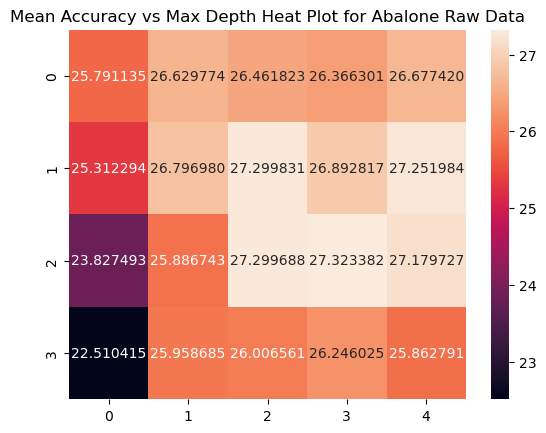

In [128]:
raw_abalone_RF = RFclassifier(abalone_data_std.iloc[:,:-1],abalone_class,1)
max_accuracy_raw_abalone_RFC =  max(raw_abalone_RF["mean_test_score"]*100)
raw_abalone_RF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028143,0.006218,0.003245,0.006490,3,3,"{'max_depth': 3, 'n_estimators': 3}",0.366923,0.428462,0.498075,0.525789,0.548114,0.473473,0.066772,17
1,0.190012,0.001982,0.014489,0.002247,3,30,"{'max_depth': 3, 'n_estimators': 30}",0.372308,0.469231,0.514242,0.537336,0.555042,0.489632,0.065332,12
2,0.312196,0.006599,0.025025,0.007635,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.408462,0.480000,0.524249,0.532717,0.525789,0.494244,0.046770,8
3,0.918734,0.007967,0.060241,0.005198,3,150,"{'max_depth': 3, 'n_estimators': 150}",0.372308,0.472308,0.512702,0.539646,0.550423,0.489477,0.064489,13
4,1.227615,0.009410,0.078820,0.000047,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.370769,0.473846,0.511932,0.536567,0.544265,0.487476,0.063308,15
5,0.037267,0.008177,0.000522,0.001045,6,3,"{'max_depth': 6, 'n_estimators': 3}",0.406154,0.471538,0.471901,0.505004,0.497306,0.470381,0.034792,18
6,0.295923,0.006257,0.015626,0.000006,6,30,"{'max_depth': 6, 'n_estimators': 30}",0.382308,0.480000,0.519630,0.565820,0.536567,0.496865,0.063651,5
7,0.478827,0.007221,0.028084,0.006003,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.393077,0.466154,0.520400,0.553503,0.545035,0.495634,0.059648,7
8,1.442747,0.021581,0.071314,0.006642,6,150,"{'max_depth': 6, 'n_estimators': 150}",0.380769,0.480769,0.531178,0.555812,0.540416,0.497789,0.063690,2
9,1.906291,0.011308,0.094861,0.000933,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.377692,0.473846,0.529638,0.555812,0.550423,0.497482,0.066554,3


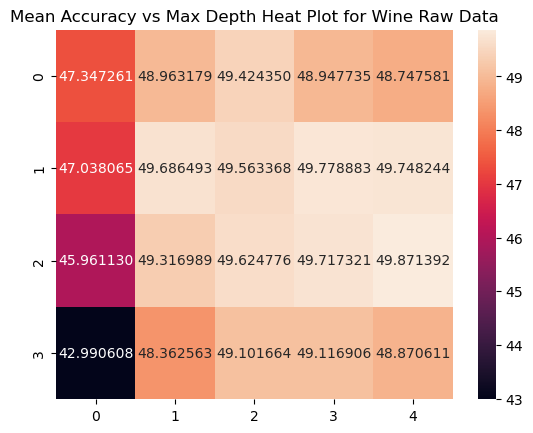

In [129]:
raw_wine_RF = RFclassifier(wine_data_std.iloc[:,:-1],wine_class,2)
max_accuracy_raw_wine_RFC = max(raw_wine_RF["mean_test_score"]*100)
raw_wine_RF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022553,0.006028,0.001322,0.002645,3,3,"{'max_depth': 3, 'n_estimators': 3}",0.240431,0.232335,0.234731,0.273054,0.252695,0.246649,0.014962,13
1,0.213203,0.007254,0.016493,0.001673,3,30,"{'max_depth': 3, 'n_estimators': 30}",0.220096,0.277844,0.241916,0.276647,0.256287,0.254558,0.021820,11
2,0.347751,0.002747,0.025442,0.005917,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.232057,0.283832,0.243114,0.276647,0.267066,0.260543,0.019796,5
3,1.026706,0.019067,0.077877,0.006708,3,150,"{'max_depth': 3, 'n_estimators': 150}",0.222488,0.288623,0.243114,0.282635,0.264671,0.260306,0.024679,6
4,1.402593,0.067925,0.097769,0.006486,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.239234,0.281437,0.241916,0.279042,0.258683,0.260062,0.017788,7
5,0.034058,0.006493,0.006919,0.008531,6,3,"{'max_depth': 6, 'n_estimators': 3}",0.193780,0.264671,0.234731,0.240719,0.267066,0.240193,0.026479,17
6,0.319767,0.006959,0.020345,0.005845,6,30,"{'max_depth': 6, 'n_estimators': 30}",0.228469,0.257485,0.252695,0.292216,0.286228,0.263418,0.023329,3
7,0.527394,0.007304,0.029593,0.007149,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.229665,0.288623,0.255090,0.274251,0.291018,0.267729,0.022935,1
8,1.484277,0.196843,0.077392,0.023448,6,150,"{'max_depth': 6, 'n_estimators': 150}",0.221292,0.291018,0.255090,0.268263,0.274251,0.261983,0.023393,4
9,2.133345,0.018876,0.104491,0.006225,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.222488,0.297006,0.250299,0.275449,0.285030,0.266054,0.026656,2


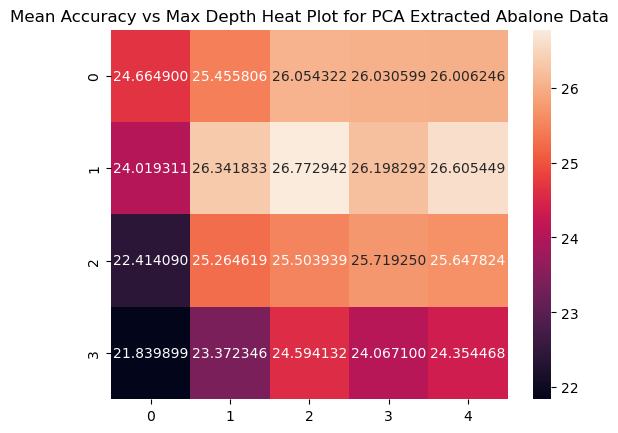

In [130]:
pca_abalone_RF = RFclassifier(PCA_extracted_abalone, abalone_class, 3)
max_accuracy_pca_abalone_RFC = max(pca_abalone_RF["mean_test_score"]*100)
pca_abalone_RF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040955,0.006760,0.003126,0.006252,3,3,"{'max_depth': 3, 'n_estimators': 3}",0.402308,0.424615,0.458045,0.482679,0.509623,0.455454,0.038621,18
1,0.310984,0.006084,0.015767,0.000231,3,30,"{'max_depth': 3, 'n_estimators': 30}",0.366154,0.464615,0.481909,0.493457,0.488068,0.458841,0.047347,17
2,0.510278,0.007754,0.025166,0.007753,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.366154,0.470000,0.503464,0.495766,0.508853,0.468847,0.053048,14
3,1.526549,0.000378,0.062769,0.000237,3,150,"{'max_depth': 3, 'n_estimators': 150}",0.360769,0.473846,0.506543,0.501155,0.502694,0.469002,0.055346,13
4,2.036662,0.019065,0.078551,0.000304,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.360769,0.463846,0.505774,0.505774,0.505774,0.468387,0.056206,15
5,0.056674,0.007650,0.003124,0.006248,6,3,"{'max_depth': 6, 'n_estimators': 3}",0.376154,0.457692,0.463433,0.515012,0.501925,0.462843,0.048561,16
6,0.500281,0.006493,0.015911,0.000309,6,30,"{'max_depth': 6, 'n_estimators': 30}",0.356154,0.459231,0.530408,0.551193,0.508083,0.481014,0.069516,6
7,0.821300,0.004264,0.025213,0.005680,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.362308,0.458462,0.532717,0.545804,0.521170,0.484092,0.067876,4
8,2.471705,0.053980,0.066086,0.011536,6,150,"{'max_depth': 6, 'n_estimators': 150}",0.370000,0.470769,0.527329,0.542725,0.511932,0.484551,0.062090,1
9,3.376086,0.425395,0.097059,0.008963,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.363077,0.469231,0.529638,0.541186,0.518861,0.484398,0.065434,2


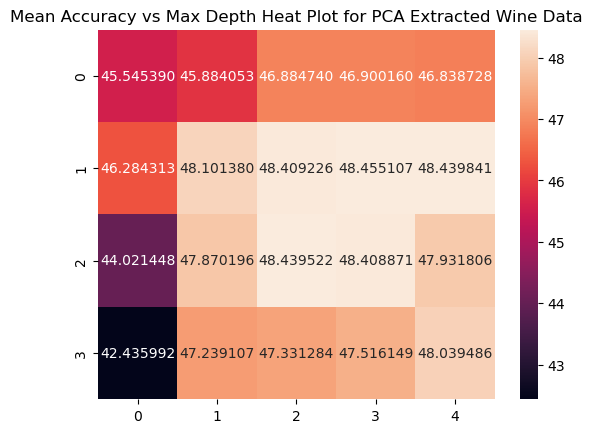

In [131]:
pca_wine_RF = RFclassifier(PCA_extracted_wine, wine_class, 4)
max_accuracy_pca_wine_RFC = max(pca_wine_RF["mean_test_score"]*100)
pca_wine_RF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026430,0.006471,0.005051,0.006472,3,3,"{'max_depth': 3, 'n_estimators': 3}",0.240431,0.267066,0.263473,0.234731,0.262275,0.253595,0.013293,11
1,0.211001,0.007670,0.015673,0.000056,3,30,"{'max_depth': 3, 'n_estimators': 30}",0.226077,0.285030,0.265868,0.267066,0.270659,0.262940,0.019657,6
2,0.347910,0.007521,0.026589,0.009204,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.230861,0.279042,0.259880,0.265868,0.264671,0.260064,0.015924,9
3,1.019057,0.005861,0.075906,0.004854,3,150,"{'max_depth': 3, 'n_estimators': 150}",0.236842,0.275449,0.261078,0.263473,0.273054,0.261979,0.013704,7
4,1.416263,0.039311,0.097629,0.006874,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.238038,0.274251,0.268263,0.261078,0.268263,0.261979,0.012677,8
5,0.034597,0.004372,0.006232,0.007632,6,3,"{'max_depth': 6, 'n_estimators': 3}",0.233254,0.249102,0.247904,0.256287,0.275449,0.252399,0.013741,12
6,0.283390,0.033200,0.017360,0.010469,6,30,"{'max_depth': 6, 'n_estimators': 30}",0.241627,0.292216,0.258683,0.270659,0.292216,0.271080,0.019569,1
7,0.572210,0.034758,0.036292,0.009139,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.244019,0.286228,0.255090,0.256287,0.297006,0.267726,0.020259,2
8,1.599076,0.022915,0.081152,0.004811,6,150,"{'max_depth': 6, 'n_estimators': 150}",0.235646,0.289820,0.249102,0.261078,0.288623,0.264854,0.021465,4
9,2.147531,0.026517,0.113716,0.010183,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.252392,0.277844,0.255090,0.268263,0.277844,0.266287,0.010858,3


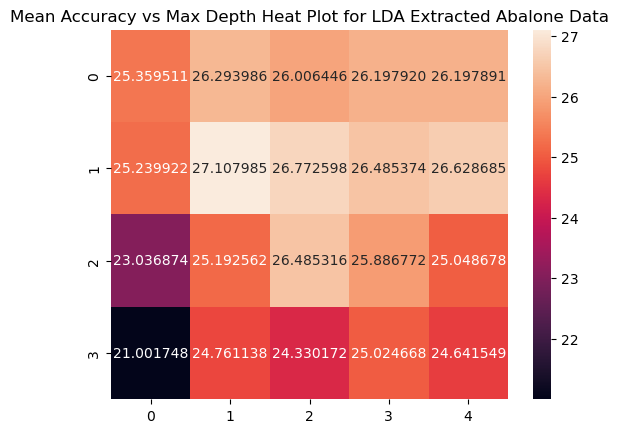

In [132]:
lda_abalone_RF = RFclassifier(LDA_extracted_abalone, abalone_class, 5)
max_accuracy_lda_abalone_RFC = max(lda_abalone_RF["mean_test_score"]*100)
lda_abalone_RF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027541,0.002515,0.004954,0.000733,3,3,"{'max_depth': 3, 'n_estimators': 3}",0.498462,0.478462,0.508853,0.548884,0.558891,0.518710,0.030503,13
1,0.286141,0.064413,0.016252,0.000741,3,30,"{'max_depth': 3, 'n_estimators': 30}",0.513846,0.482308,0.542725,0.551193,0.555812,0.529177,0.027602,7
2,0.431533,0.014238,0.026016,0.003021,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.512308,0.486154,0.543495,0.558122,0.569669,0.533949,0.030673,2
3,1.252770,0.025617,0.066682,0.004214,3,150,"{'max_depth': 3, 'n_estimators': 150}",0.512308,0.482308,0.541186,0.559661,0.551963,0.529485,0.028543,6
4,1.726768,0.037247,0.085147,0.005029,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.510769,0.484615,0.541186,0.556582,0.563510,0.531333,0.029582,5
5,0.039866,0.003411,0.005060,0.000834,6,3,"{'max_depth': 6, 'n_estimators': 3}",0.503846,0.470000,0.531178,0.563510,0.487298,0.511166,0.033040,17
6,0.391513,0.012766,0.018329,0.000883,6,30,"{'max_depth': 6, 'n_estimators': 30}",0.496154,0.491538,0.541955,0.569669,0.542725,0.528408,0.029969,8
7,0.636960,0.006266,0.027599,0.000850,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.503846,0.493846,0.551963,0.574288,0.561971,0.537183,0.032246,1
8,1.888889,0.025391,0.073819,0.006549,6,150,"{'max_depth': 6, 'n_estimators': 150}",0.498462,0.491538,0.548114,0.564280,0.558122,0.532103,0.030809,4
9,2.583198,0.047485,0.096659,0.004211,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.494615,0.483846,0.547344,0.575828,0.559661,0.532259,0.036435,3


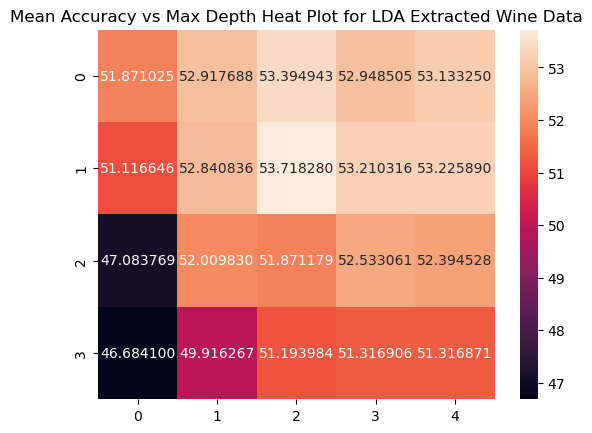

In [133]:
lda_wine_RF = RFclassifier(LDA_extracted_wine, wine_class, 6)
max_accuracy_lda_wine_RFC = max(lda_wine_RF["mean_test_score"]*100)
lda_wine_RF

In [134]:
wine_RFC = [max_accuracy_raw_wine_RFC, max_accuracy_pca_wine_RFC, max_accuracy_lda_wine_RFC]
abalone_RFC = [max_accuracy_raw_abalone_RFC, max_accuracy_pca_abalone_RFC, max_accuracy_lda_abalone_RFC]

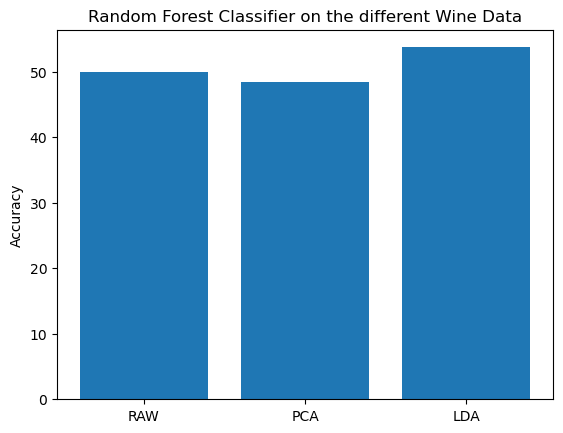

In [135]:
plt.bar(x= range(0,3), height = wine_RFC, tick_label= ["RAW", "PCA", "LDA"])
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier on the different Wine Data")
plt.show()

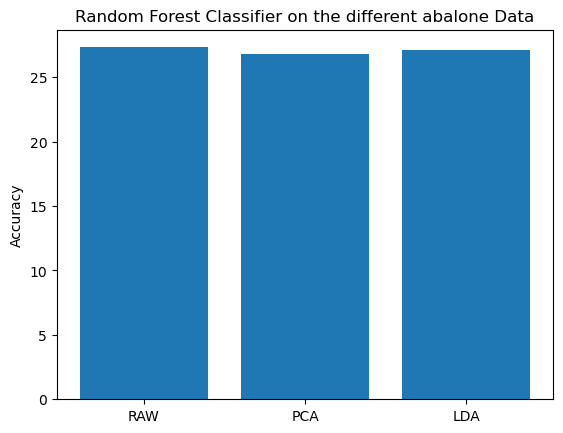

In [136]:
plt.bar(x= range(0,3), height = abalone_RFC, tick_label= ["RAW", "PCA", "LDA"])
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier on the different abalone Data")
plt.show()

In [137]:
wine_RFC_pd = pd.DataFrame(wine_RFC, index = ["Raw Wine","PCA Extracted Wine","LDA Extracted Wine"], columns = ["Random Forest Classifier"]).T
wine = pd.concat([wine, wine_RFC_pd])

abalone_RFC_pd = pd.DataFrame(abalone_RFC, index = ["Raw Abalone","PCA Extracted Abalone","LDA Extracted Abalone"], columns = ["Random Forest Classifier"]).T
abalone = pd.concat([abalone, abalone_RFC_pd])

In [138]:
wine

,Raw Wine,PCA Extracted Wine,LDA Extracted Wine
Knn,69.384615,68.461538,67.769231
Multinomial Naive Bayes,43.666311,43.650927,43.650927
Complement Naive Bayes,41.604335,41.680772,41.911447
Decision Tree Classifier,49.977983,46.130408,54.318245
Random Forest Classifier,49.871392,48.455107,53.718280


In [139]:
abalone

,Raw Abalone,PCA Extracted Abalone,LDA Extracted Abalone
Knn,29.306220,29.066986,30.741627
Multinomial Naive Bayes,21.217001,16.499069,16.499069
Complement Naive Bayes,17.816520,17.409248,20.402630
Decision Tree Classifier,25.814600,25.407558,26.221442
Random Forest Classifier,27.323382,26.772942,27.107985


# Q.5) Gradiant Tree Boosting

In [140]:
GBC = GradientBoostingClassifier()

In [141]:
def GBClassifier(x,y,z):
    md_GBC = { 'n_estimators' : [5,10,50,100] }
    GBC_fitting = GridSearchCV(estimator = GBC, param_grid = md_GBC, cv =5, refit = 'accuracy_score')
    GBC_results = GBC_fitting.fit(x, y)
    GBC_results_pd = pd.DataFrame(GBC_results.cv_results_)
    plt.scatter( [5,10,50,100] , GBC_results_pd["mean_test_score"]*100)
    
    
    if(z==1):
        plt.title('Mean Accuracy vs Estimators for Abalone Raw Data')
    elif(z==2):
        plt.title('Mean Accuracy vs Estimators for Wine Raw Data')
    elif(z==3):
        plt.title('Mean Accuracy vs Estimators for PCA Extracted Abalone Data')
    elif(z==4):
        plt.title('Mean Accuracy vs Estimators for PCA Extracted Wine Data')
    elif(z==5):
        plt.title('Mean Accuracy vs Estimators for LDA Extracted Abalone Data')
    elif(z==6):
        plt.title('Mean Accuracy vs Estimators for LDA Extracted Wine Data')
    else:
        plt.title('Mean Accuracy vs Estimators')
    
    plt.xlabel('Estimators')
    plt.ylabel('Mean Accuracy')
    plt.show()
    return GBC_results_pd

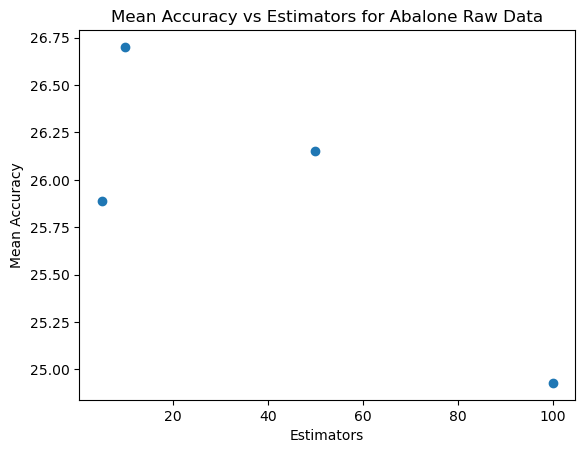

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.955949,0.104332,0.011497,0.003269,5,{'n_estimators': 5},0.209330,0.280240,0.251497,0.269461,0.283832,0.258872,0.027205,3
1,3.812584,0.132292,0.013300,0.000904,10,{'n_estimators': 10},0.221292,0.291018,0.267066,0.267066,0.288623,0.267013,0.025035,1
2,19.284186,0.768576,0.032964,0.001091,50,{'n_estimators': 50},0.212919,0.277844,0.275449,0.263473,0.277844,0.261506,0.024871,2
3,37.902800,1.211287,0.056617,0.003455,100,{'n_estimators': 100},0.206938,0.255090,0.259880,0.259880,0.264671,0.249292,0.021393,4


In [142]:
GB_raw_abalone = GBClassifier(abalone_data_std.iloc[:,:-1], abalone_class, 1)
max_accuracy_raw_abalone_GB = max(GB_raw_abalone["mean_test_score"]*100)
GB_raw_abalone

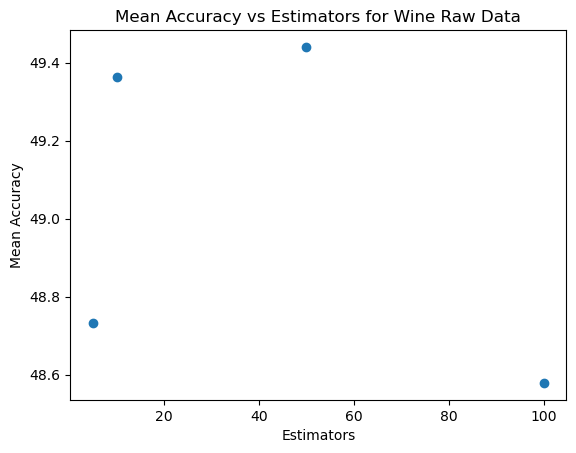

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.760363,0.013357,0.006594,0.000358,5,{'n_estimators': 5},0.402308,0.466154,0.513472,0.518091,0.536567,0.487318,0.048438,3
1,1.550405,0.051542,0.007932,0.000670,10,{'n_estimators': 10},0.402308,0.461538,0.517321,0.540416,0.546574,0.493631,0.054631,2
2,6.967836,1.163577,0.014949,0.004990,50,{'n_estimators': 50},0.382308,0.477692,0.539646,0.535797,0.536567,0.494402,0.060635,1
3,14.729186,1.297686,0.033579,0.007713,100,{'n_estimators': 100},0.374615,0.450769,0.528868,0.535027,0.539646,0.485785,0.064446,4


In [143]:
GB_raw_wine = GBClassifier(wine_data_std.iloc[:,:-1], wine_class, 2)
max_accuracy_raw_wine_GB = max(GB_raw_wine["mean_test_score"]*100)
GB_raw_wine

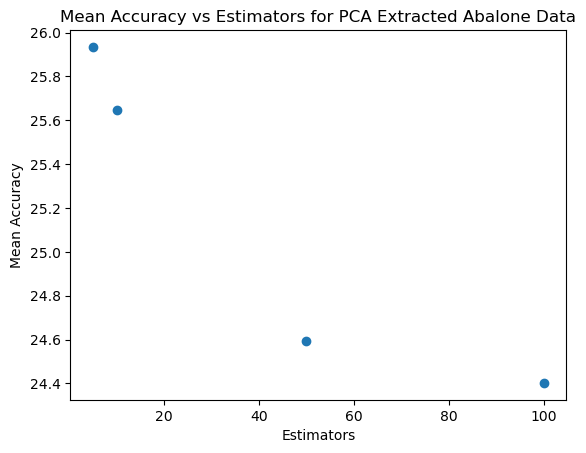

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.692925,0.078198,0.009961,0.001409,5,{'n_estimators': 5},0.224880,0.269461,0.259880,0.261078,0.281437,0.259347,0.018876,1
1,5.316711,0.156349,0.013865,0.000517,10,{'n_estimators': 10},0.222488,0.267066,0.241916,0.271856,0.279042,0.256474,0.021095,2
2,27.049488,1.017755,0.033979,0.001860,50,{'n_estimators': 50},0.205742,0.256287,0.250299,0.256287,0.261078,0.245939,0.020387,3
3,49.186876,1.892829,0.056245,0.008472,100,{'n_estimators': 100},0.194976,0.251497,0.257485,0.259880,0.256287,0.244025,0.024676,4


In [144]:
GB_pca_abalone = GBClassifier(PCA_extracted_abalone, abalone_class, 3)
max_accuracy_pca_abalone_GB = max(GB_pca_abalone["mean_test_score"]*100)
GB_pca_abalone

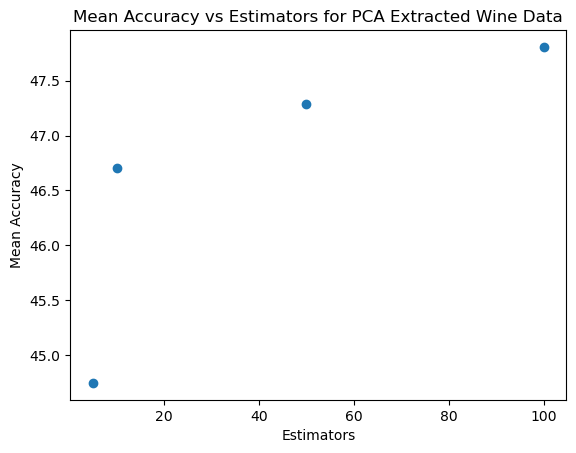

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.343571,0.015689,0.007557,0.007039,5,{'n_estimators': 5},0.356923,0.466923,0.471901,0.487298,0.454196,0.447448,0.046488,4
1,2.661245,0.001048,0.006372,0.007806,10,{'n_estimators': 10},0.376923,0.469231,0.471132,0.513472,0.504234,0.466998,0.048336,3
2,13.389486,0.043449,0.018752,0.006252,50,{'n_estimators': 50},0.371538,0.466154,0.505774,0.535027,0.485758,0.472850,0.055544,2
3,26.848853,0.048403,0.025240,0.007610,100,{'n_estimators': 100},0.382308,0.470000,0.516551,0.531178,0.490377,0.478083,0.052323,1


In [145]:
GB_pca_wine = GBClassifier(PCA_extracted_wine, wine_class, 4)
max_accuracy_pca_wine_GB = max(GB_pca_wine["mean_test_score"]*100)
GB_pca_wine

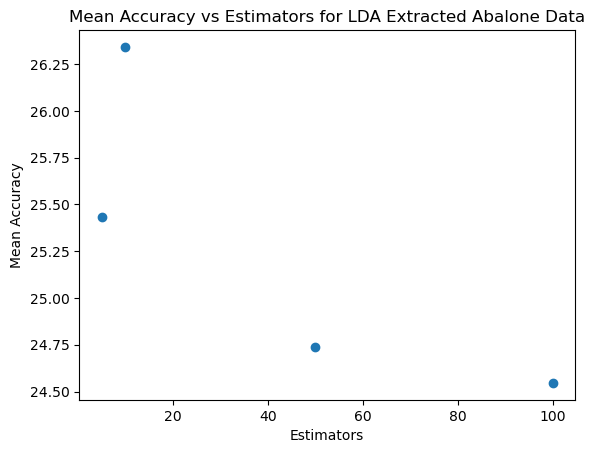

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.603798,0.053917,0.014819,0.001390,5,{'n_estimators': 5},0.224880,0.264671,0.243114,0.249102,0.289820,0.254317,0.021849,2
1,3.225299,0.119874,0.016260,0.004838,10,{'n_estimators': 10},0.227273,0.271856,0.257485,0.279042,0.281437,0.263419,0.019908,1
2,16.331523,0.697843,0.031352,0.009747,50,{'n_estimators': 50},0.218900,0.252695,0.252695,0.250299,0.262275,0.247373,0.014819,3
3,32.279690,1.128755,0.052427,0.006736,100,{'n_estimators': 100},0.209330,0.258683,0.249102,0.243114,0.267066,0.245459,0.019828,4


In [146]:
GB_lda_abalone = GBClassifier(LDA_extracted_abalone, abalone_class, 5)
max_accuracy_lda_abalone_GB = max(GB_lda_abalone["mean_test_score"]*100)
GB_lda_abalone

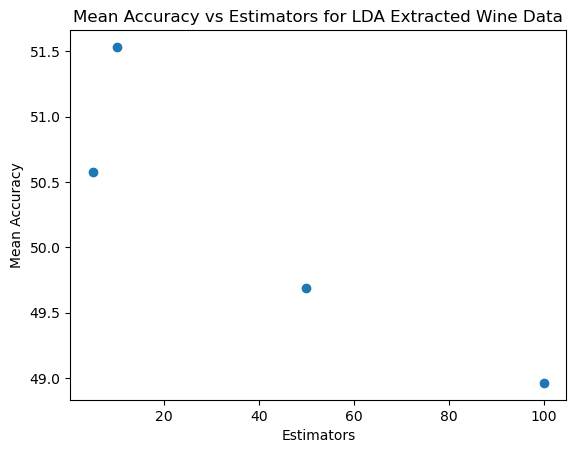

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.800045,0.003299,0.003127,0.006254,5,{'n_estimators': 5},0.506154,0.500769,0.498845,0.525019,0.498075,0.505773,0.010028,2
1,1.604246,0.032857,0.009386,0.007663,10,{'n_estimators': 10},0.500000,0.485385,0.530408,0.551963,0.508853,0.515322,0.023422,1
2,8.025792,0.032201,0.014714,0.003398,50,{'n_estimators': 50},0.450000,0.473077,0.515012,0.541186,0.505004,0.496856,0.032006,3
3,16.034925,0.013574,0.026411,0.006333,100,{'n_estimators': 100},0.436154,0.466154,0.513472,0.529638,0.502694,0.489622,0.033913,4


In [147]:
GB_lda_wine = GBClassifier(LDA_extracted_wine, wine_class, 6)
max_accuracy_lda_wine_GB = max(GB_lda_wine["mean_test_score"]*100)
GB_lda_wine

In [148]:
GB_abalone = [max_accuracy_raw_abalone_GB, max_accuracy_pca_abalone_GB, max_accuracy_lda_abalone_GB]
GB_wine = [max_accuracy_raw_wine_GB, max_accuracy_pca_wine_GB, max_accuracy_lda_wine_GB]

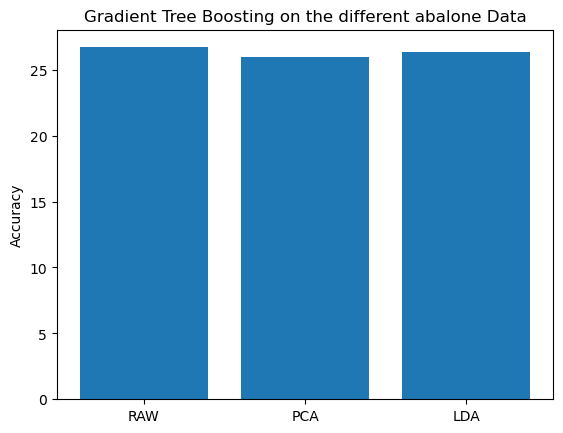

In [149]:
plt.bar(x= range(0,3), height = GB_abalone, tick_label= ["RAW", "PCA", "LDA"])
plt.ylabel("Accuracy")
plt.title("Gradient Tree Boosting on the different abalone Data")
plt.show()

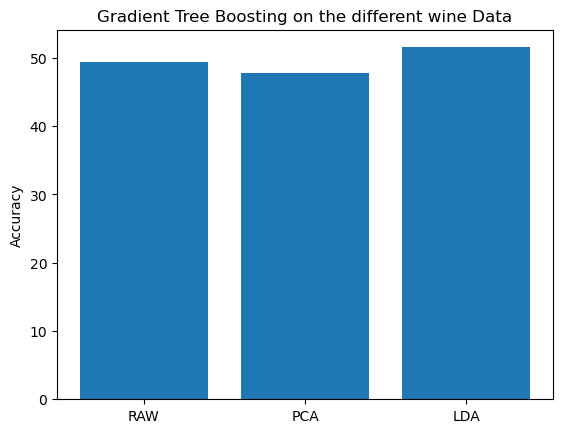

In [150]:
plt.bar(x= range(0,3), height = GB_wine, tick_label= ["RAW", "PCA", "LDA"])
plt.ylabel("Accuracy")
plt.title("Gradient Tree Boosting on the different wine Data")
plt.show()

In [151]:
GB_abalone_pd = pd.DataFrame(GB_abalone, index = ["Raw Abalone","PCA Extracted Abalone","LDA Extracted Abalone"], columns = ["Gradient Tree Boosting"]).T
abalone = pd.concat([abalone, GB_abalone_pd])
GB_wine_pd = pd.DataFrame(GB_wine, index = ["Raw Wine","PCA Extracted Wine","LDA Extracted Wine"], columns = ["Gradient Tree Boosting"]).T
wine = pd.concat([wine, GB_wine_pd])

In [152]:
abalone

,Raw Abalone,PCA Extracted Abalone,LDA Extracted Abalone
Knn,29.306220,29.066986,30.741627
Multinomial Naive Bayes,21.217001,16.499069,16.499069
Complement Naive Bayes,17.816520,17.409248,20.402630
Decision Tree Classifier,25.814600,25.407558,26.221442
Random Forest Classifier,27.323382,26.772942,27.107985
Gradient Tree Boosting,26.701286,25.934733,26.341862


In [153]:
wine

,Raw Wine,PCA Extracted Wine,LDA Extracted Wine
Knn,69.384615,68.461538,67.769231
Multinomial Naive Bayes,43.666311,43.650927,43.650927
Complement Naive Bayes,41.604335,41.680772,41.911447
Decision Tree Classifier,49.977983,46.130408,54.318245
Random Forest Classifier,49.871392,48.455107,53.718280
Gradient Tree Boosting,49.440185,47.808279,51.532173


The Gradient Tree boosting produced relatively lower accuracy than that of Random Forest Classifier in both datasets

This can be because the Random forest classifier are less impact on the change in the data instances, where as the gradient tree usually gets better with the iterations

But the variations are not so drastic

# Q.6) Final Results

In [154]:
Setting_abalone = ["Optimal K = {}".format(k_value_raw_abalone), 'Multinomial NB provides relatively lower accuracy', 'Complement NB provides relatively better accuracy','Best Fitting Max Depth is 4', 'max_depth = 6 and n_estimators = 50', 'n_estimators = 10']
Setting_wine = ["Optimal K = {}".format(k_value_raw_wine), 'Multinomial NB provides relatively better accuracy', 'Complement NB provides relatively lower accuracy', 'Best Fitting Max Depth is 3', 'n_estimator = 200 and Max Depth = 3', 'n_estimators = 10']

In [155]:
abalone.insert(0, "Setting", Setting_abalone, True)
wine.insert(0, "Setting", Setting_wine, True)

In [156]:
abalone

,Setting,Raw Abalone,PCA Extracted Abalone,LDA Extracted Abalone
Knn,Optimal K = 66,29.306220,29.066986,30.741627
Multinomial Naive Bayes,Multinomial NB provides relatively lower accuracy,21.217001,16.499069,16.499069
Complement Naive Bayes,Complement NB provides relatively better accuracy,17.816520,17.409248,20.402630
Decision Tree Classifier,Best Fitting Max Depth is 4,25.814600,25.407558,26.221442
Random Forest Classifier,max_depth = 6 and n_estimators = 50,27.323382,26.772942,27.107985
Gradient Tree Boosting,n_estimators = 10,26.701286,25.934733,26.341862


In [157]:
wine

,Setting,Raw Wine,PCA Extracted Wine,LDA Extracted Wine
Knn,Optimal K = 47,69.384615,68.461538,67.769231
Multinomial Naive Bayes,Multinomial NB provides relatively better accu...,43.666311,43.650927,43.650927
Complement Naive Bayes,Complement NB provides relatively lower accuracy,41.604335,41.680772,41.911447
Decision Tree Classifier,Best Fitting Max Depth is 3,49.977983,46.130408,54.318245
Random Forest Classifier,n_estimator = 200 and Max Depth = 3,49.871392,48.455107,53.718280
Gradient Tree Boosting,n_estimators = 10,49.440185,47.808279,51.532173


KNN Model Produced the best and optimal accuracy in both the datasets (Wine, abalone)


In Knn, the dimensinality reduction has produced better results on abalone data.

In general the LDA reduction produced better accuracy than the other PCA reduction techniques

Dimensionality reduction has yield better accuracy in every model that deals with trees, like Decision tree classifier, Random Forest Classifier, Gradient Tree Boosting. These models benefit from dimensionality reduction more than other models.

This is Because, the lesser the dimensions the better the tree function, since it takes lesser depths to reach all the pure leaf nodes.

The LDA datasets in both abalone and wine produced relatively higher accuracies

The Highest accuracies are generated by the KNN model then any other model

In the case of Wine dataset Multinomial Naive bayes produce better accuracies

In the case of abalone dataset complement Naive bayes produce better accuracies

Complement Naive bayes produced least accuracies than any other model with wine dataset

Multinomial Naive Bayes produced least accuracies than any other models with abalone dataset

In case of Wine dataset the max depth is 3 in both Decision tree and Random forest classifier

In case of abalone dataset the max depth is 4 for Decision tree and Max depth is 6 for the random forest classifier